**Background information**
The BCG project team thinks that building a churn model to understand whether price sensitivity is the largest driver of churn has potential. The client has sent over some data and the AD wants you to perform some exploratory data analysis.

The data that was sent over includes:

   - Historical customer data: Customer data such as usage, sign up date, forecasted usage etc
   - Historical pricing data: variable and fixed pricing data etc
   - Churn indicator: whether each customer has churned or not

**Dataset description:**
client_data.csv

- id = client company identifier
- activity_new = category of the company’s activity
- channel_sales = code of the sales channel
- cons_12m = electricity consumption of the past 12 months
- cons_gas_12m = gas consumption of the past 12 months
- cons_last_month = electricity consumption of the last month
- date_activ = date of activation of the contract
- date_end = registered date of the end of the contract
- date_modif_prod = date of the last modification of the product
- date_renewal = date of the next contract renewal
- forecast_cons_12m = forecasted electricity consumption for next 12 months
- forecast_cons_year = forecasted electricity consumption for the next calendar year
- forecast_discount_energy = forecasted value of current discount
- forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months
- forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)
- forecast_price_energy_peak = forecasted energy price for 2nd period (peak)
- forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)
- has_gas = indicated if client is also a gas client
- imp_cons = current paid consumption
- margin_gross_pow_ele = gross margin on power subscription
- margin_net_pow_ele = net margin on power subscription
- nb_prod_act = number of active products and services
- net_margin = total net margin
- num_years_antig = antiquity of the client (in number of years)
- origin_up = code of the electricity campaign the customer first subscribed to
- pow_max = subscribed power
- churn = has the client churned over the next 3 months

price_data.csv

- id = client company identifier
- price_date = reference date
- price_off_peak_var = price of energy for the 1st period (off peak)
- price_peak_var = price of energy for the 2nd period (peak)
- price_mid_peak_var = price of energy for the 3rd period (mid peak)
- price_off_peak_fix = price of power for the 1st period (off peak)
- price_peak_fix = price of power for the 2nd period (peak)
- price_mid_peak_fix = price of power for the 3rd period (mid peak)

Note: some fields are hashed text strings. This preserves the privacy of the original data but the commercial meaning is retained and so they may have predictive power

**Tasks to be performed**

- Perform some exploratory data analysis. Look into the data types, data statistics, specific parameters, and variable distributions. This first subtask is for you to gain a holistic understanding of the dataset. You should spend around 1 hour on this.

- Verify the hypothesis of price sensitivity being to some extent correlated with churn. It is up to you to define price sensitivity and calculate it. You should spend around 30 minutes on this.

In [309]:
# Import the basic libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("darkgrid")
pd.options.display.max_rows = 100

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# Import the given datasets

client_df = pd.read_csv(r'C:\Users\Nima\Desktop\BCG_Data_science\Task 2\client_data.csv')
price_df = pd.read_csv(r'C:\Users\Nima\Desktop\BCG_Data_science\Task 2\price_data.csv')

In [3]:
# Exploring the client_df dataset

client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [4]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

**Observations**
1. There are 26 columns witj 14606 rows of data with mixed data types ( object, int and float)
2. No missing values but we can visualize to make sure.
3. There are some columns with dates , we need to change the data type to datetime

<AxesSubplot:>

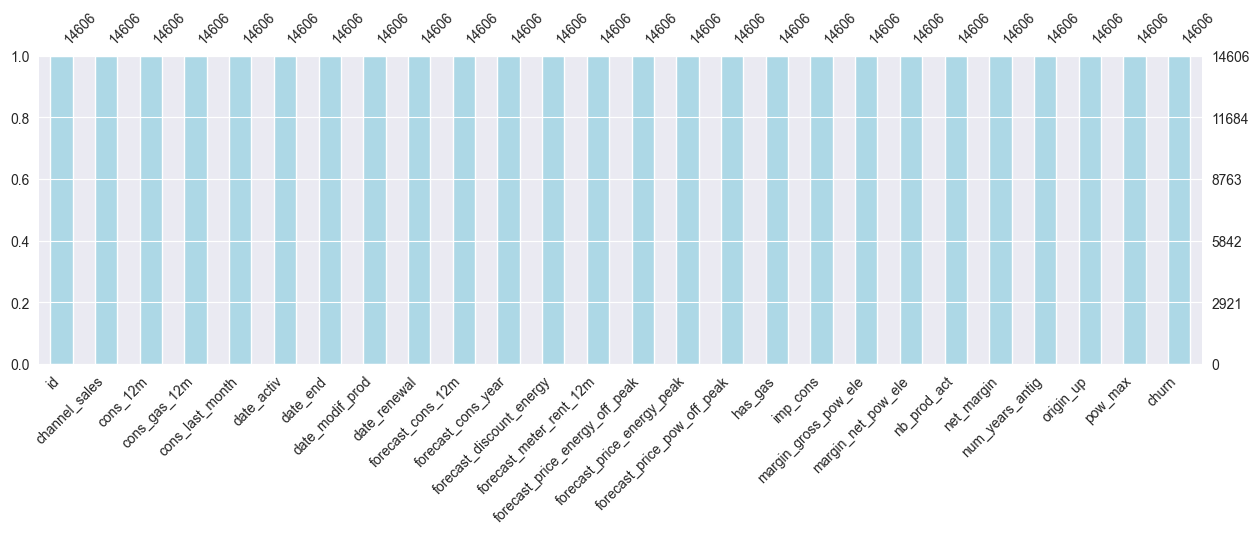

In [5]:
## Visualizing the missing values

import missingno as msno

msno.bar(client_df, color="lightblue", figsize=(15,4), fontsize=10)

In [6]:
# Changing data type to datetime wherever necessary

import datetime

client_df[["date_activ", "date_end", "date_modif_prod", "date_renewal"]] = client_df[["date_activ", "date_end", "date_modif_prod", "date_renewal"]].apply(pd.to_datetime)
client_df.select_dtypes(include='datetime').head(2)

,date_activ,date_end,date_modif_prod,date_renewal
0,2013-06-15,2016-06-15,2015-11-01,2015-06-23
1,2009-08-21,2016-08-30,2009-08-21,2015-08-31


In [7]:
# Lets add a column, find the duration between the beginning and end of a service period
client_df['days_diff'] = client_df['date_end'] - client_df['date_activ']
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,days_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,1096 days
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,2566 days
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,2192 days


In [8]:
# Lets check the statistics aspects of the client_df dataset

client_df.describe().drop('count', axis=0)

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,days_diff
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152,2007 days 12:54:07.542105984
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175,604 days 21:00:56.519157368
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000,731 days 00:00:00
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000,1461 days 00:00:00
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000,1828 days 12:00:00
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000,2353 days 00:00:00
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000,4795 days 00:00:00


In [9]:
client_df.describe(include='object').drop('count', axis=0)

,id,channel_sales,has_gas,origin_up
unique,14606,8,2,6
top,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,f,lxidpiddsbxsbosboudacockeimpuepw
freq,1,6754,11955,7097


In [10]:
df = client_df[['channel_sales','has_gas', 'origin_up']]

def value_counts (df):
    for col in df.columns:
        print("\n * {} *:\n {} unique values".format(col,df[col].value_counts()))

In [11]:
value_counts(df)


 * channel_sales *:
 foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64 unique values

 * has_gas *:
 f    11955
t     2651
Name: has_gas, dtype: int64 unique values

 * origin_up *:
 lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64 unique values


**Observations**

*For the 'channel_sales' column, there are 8 unique values with one labelled as missing, probably those values are actuallu missing*

*'has_gas'column has two values, probably f = for false, t= for true*

*'origin_up' column has 6 unique values, with one labelled as missing, probably those values are actuallu missing*

**Lets Visualize**

In [78]:
target = np.round((client_df.churn.value_counts()/client_df.churn.value_counts().sum())*100,2)
target

0    90.28
1     9.72
Name: churn, dtype: float64

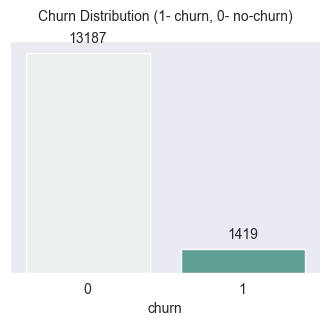

In [12]:
## Lets visualize the distribution of churn and no-churn

plt.figure(figsize=(4,3))
ax = sns.countplot(x ='churn', data = client_df, palette="light:#5A9")
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),  
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=10)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)

ax.set_title('Churn Distribution (1- churn, 0- no-churn)', pad=15, fontsize=10)
ax.axes.get_yaxis().set_visible(False)

plt.yticks([])

plt.show()


*The plot above shows there is an imbalance between the two classes, we need to address this accordingly.It is common to have only a small fraction of transactions fradulent and that is what exactly what our dataset depicts. Imbalance is not the problem but there are a few things to be addressed while handling it.Referring to the article below:*
***https://towardsdatascience.com/class-imbalance-in-machine-learning-problems-a-practical-guide-4fb81eee0041***

*1. Choosing the wrong metric (instead of Accuracy metric, we can opt for precision @ fixed recall, recall @ fixed precision or F1-Score which will take into account FNs)*

*2. Training/serving skew (this happens when the training data set used to train the model is not the same as the data used at inference time. This is an example of manually rebalanced dataset*

*3. Data scarcity (if the positive samples aren't large enough, the model can easily memorize these samples and this leads to overfitting.) *

**However, we will not rebalance the data  as upsampling minority class will introducs training/skewing skew as the the positive classes are copied, the actual data pattern can be distorted AND downsampling majority class is assuming all samples are equally important which might not be the case.**

We will address this issue*

In [240]:
client_df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'days_diff'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of churning frequency over the years')

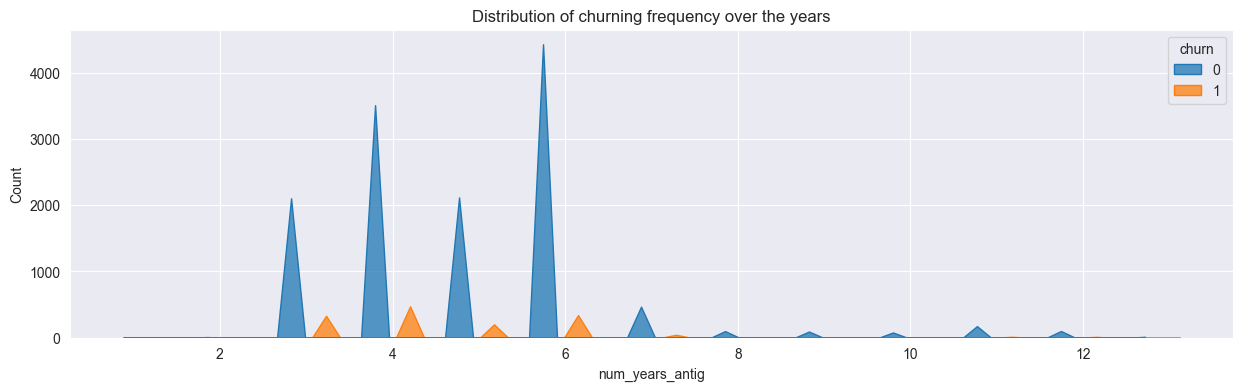

In [249]:
plt.subplots(figsize=(15,4))
sns.histplot(data=client_df,x='num_years_antig', hue='churn', element="poly", multiple='dodge', shrink=5)
plt.title('Distribution of churning frequency over the years')

*From the above plot,we can see that there is a rise of customers of churning at the initial period. If we can find out the price fluctuations or any other contributing factors of them leaving, we can find a way to retain them.*

array([[<AxesSubplot:title={'center':'cons_12m'}>,
        <AxesSubplot:title={'center':'cons_gas_12m'}>,
        <AxesSubplot:title={'center':'cons_last_month'}>,
        <AxesSubplot:title={'center':'date_activ'}>,
        <AxesSubplot:title={'center':'date_end'}>],
       [<AxesSubplot:title={'center':'date_modif_prod'}>,
        <AxesSubplot:title={'center':'date_renewal'}>,
        <AxesSubplot:title={'center':'forecast_cons_12m'}>,
        <AxesSubplot:title={'center':'forecast_cons_year'}>,
        <AxesSubplot:title={'center':'forecast_discount_energy'}>],
       [<AxesSubplot:title={'center':'forecast_meter_rent_12m'}>,
        <AxesSubplot:title={'center':'forecast_price_energy_off_peak'}>,
        <AxesSubplot:title={'center':'forecast_price_energy_peak'}>,
        <AxesSubplot:title={'center':'forecast_price_pow_off_peak'}>,
        <AxesSubplot:title={'center':'imp_cons'}>],
       [<AxesSubplot:title={'center':'margin_gross_pow_ele'}>,
        <AxesSubplot:title={'center'

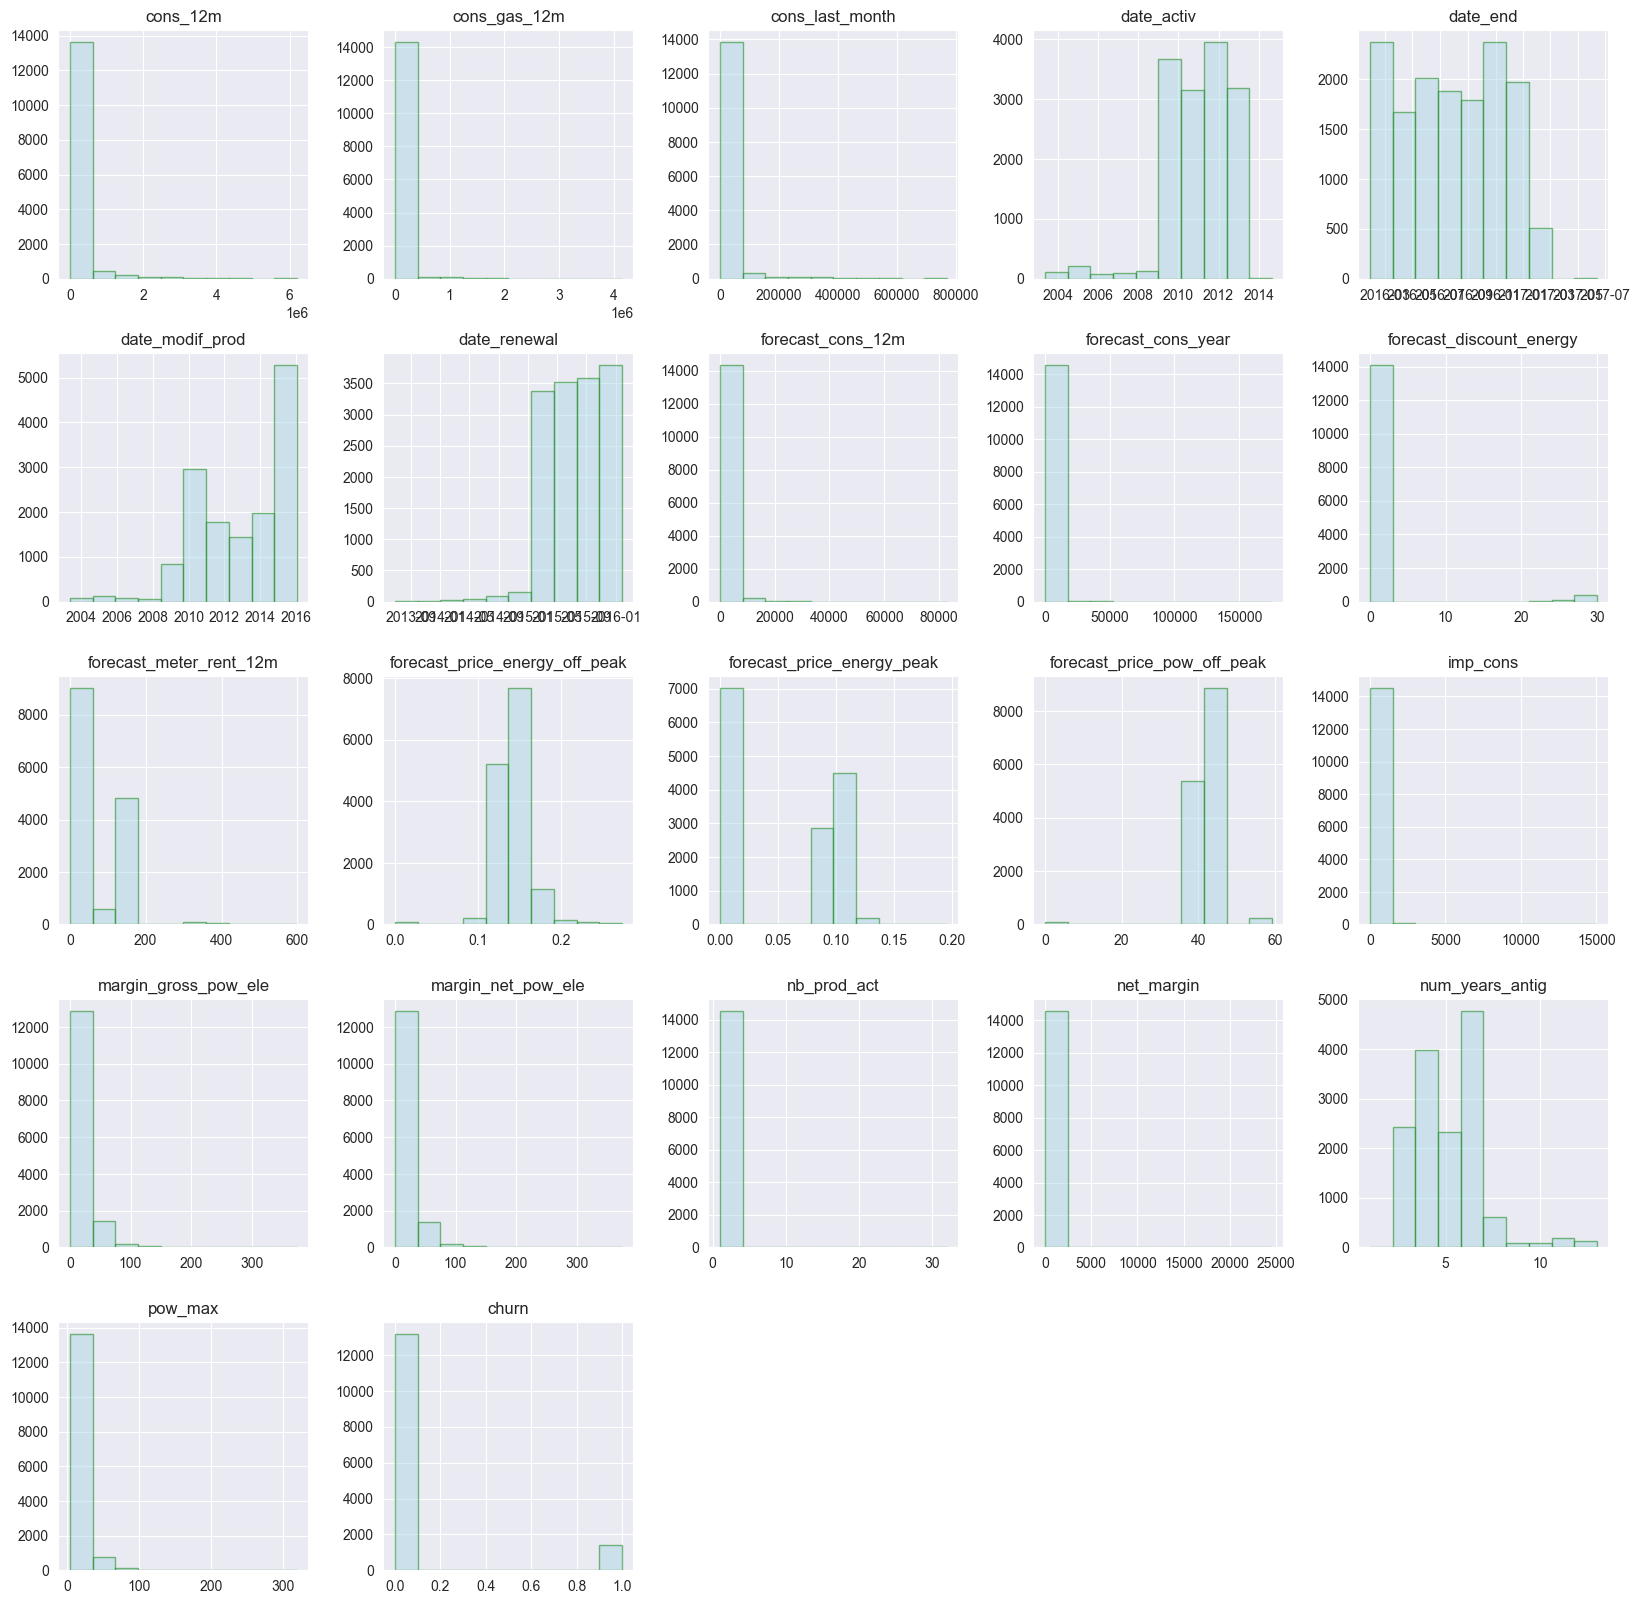

In [313]:
# Visualize the distribution of the whole dataset

client_df.hist(figsize=(20,20), color = "lightblue", ec="green", alpha=0.5)
plt.show()

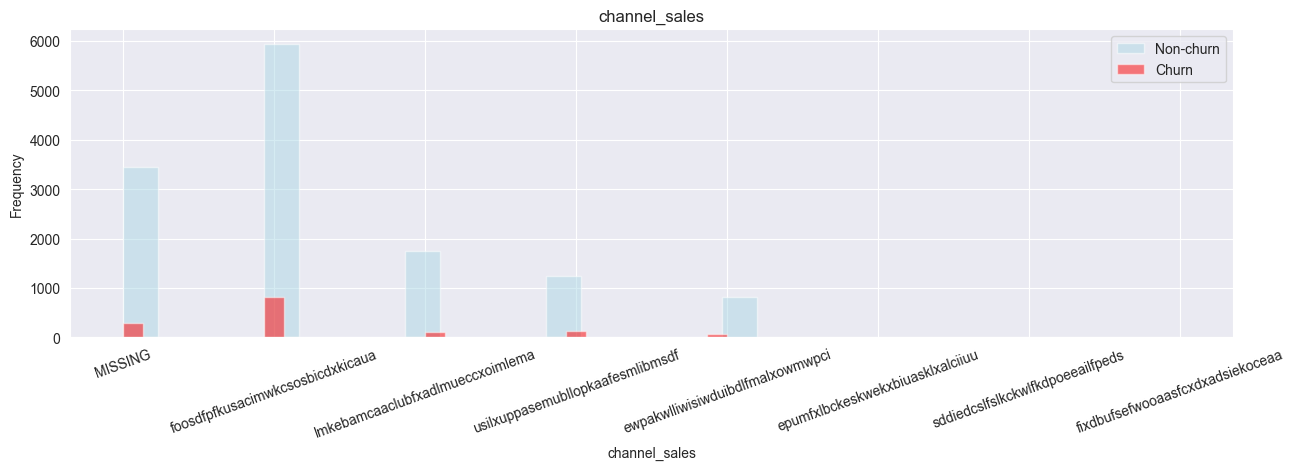

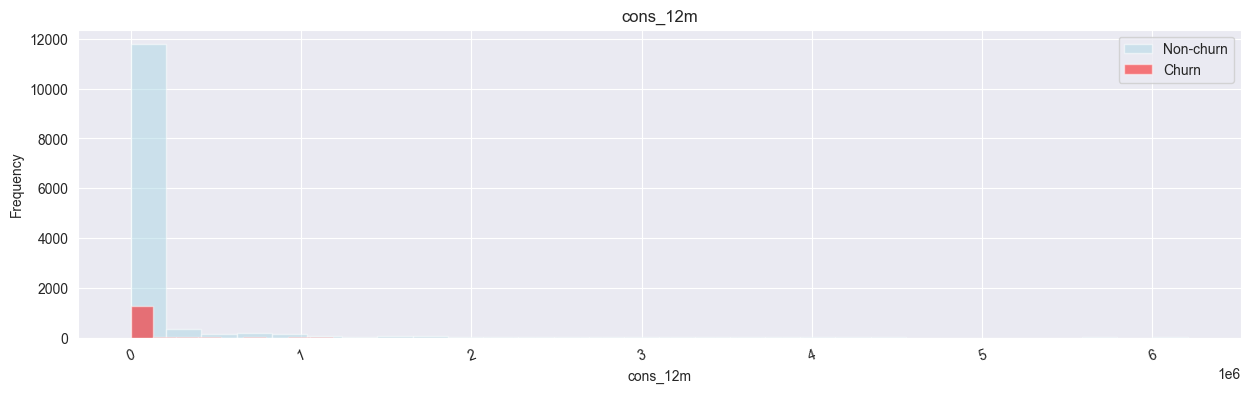

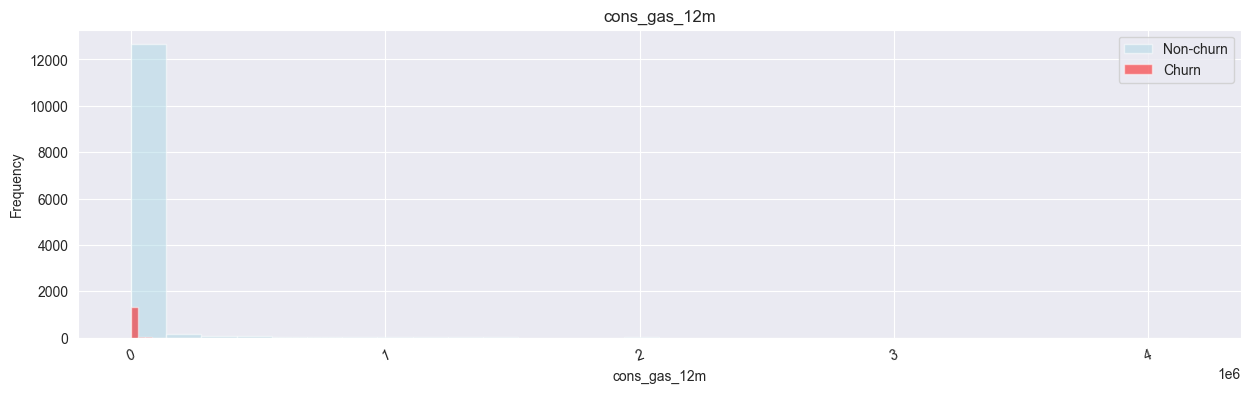

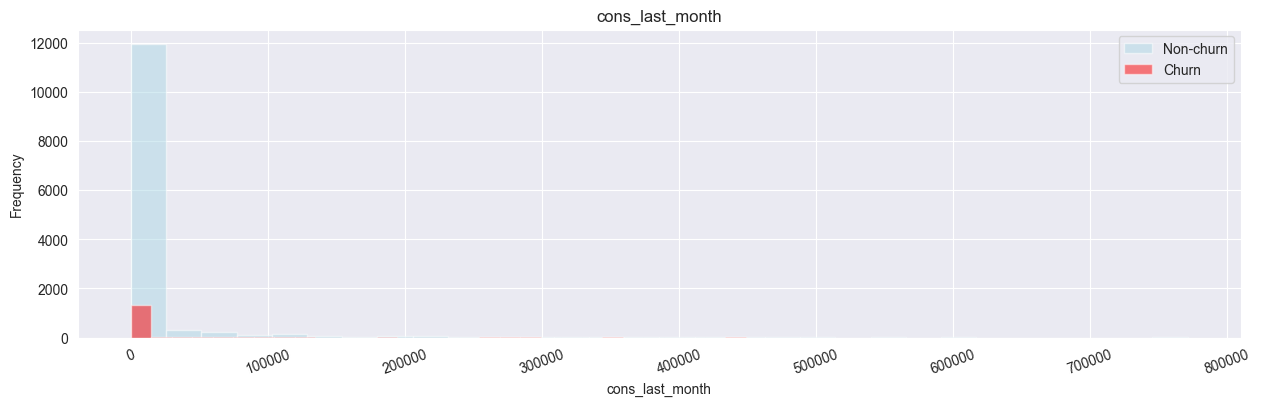

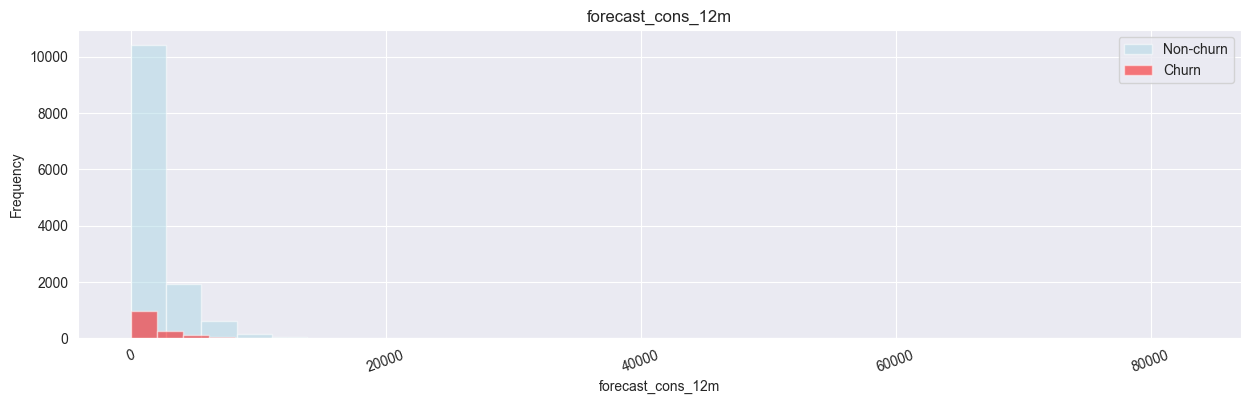

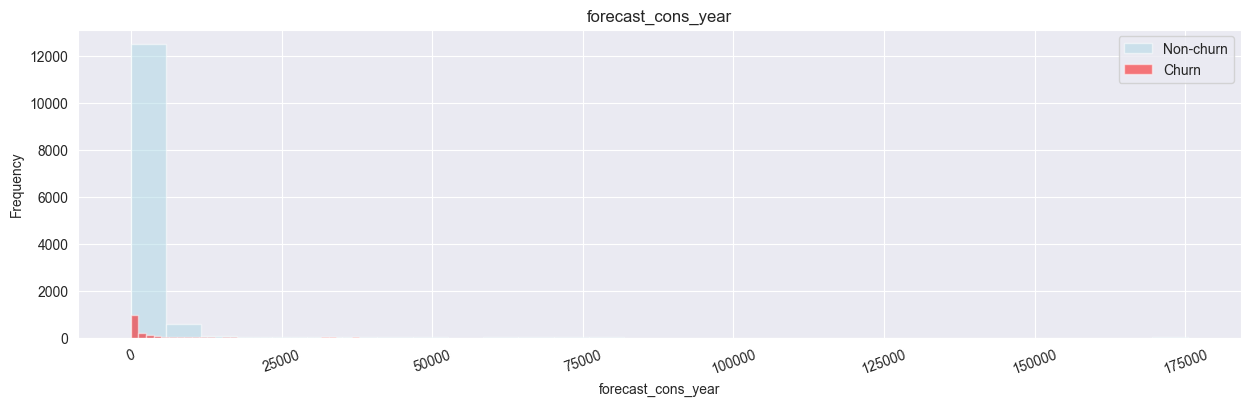

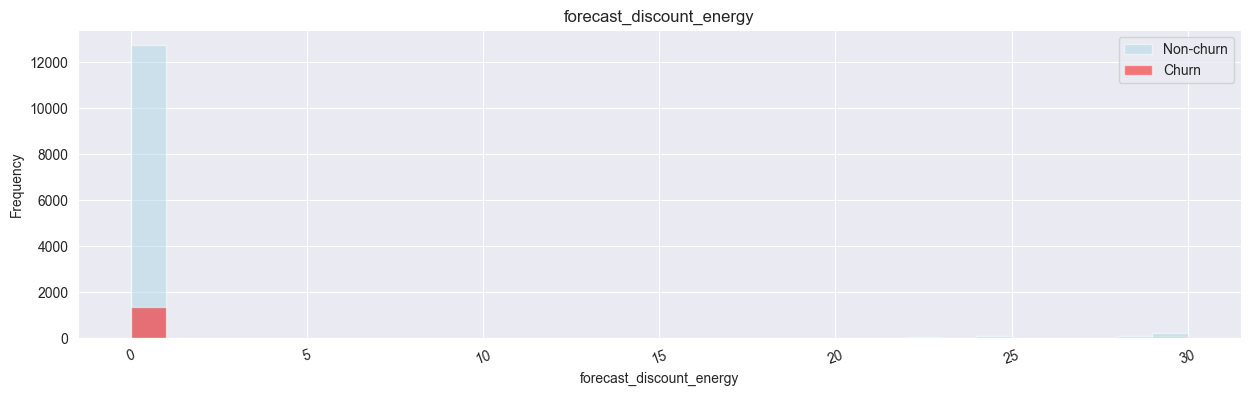

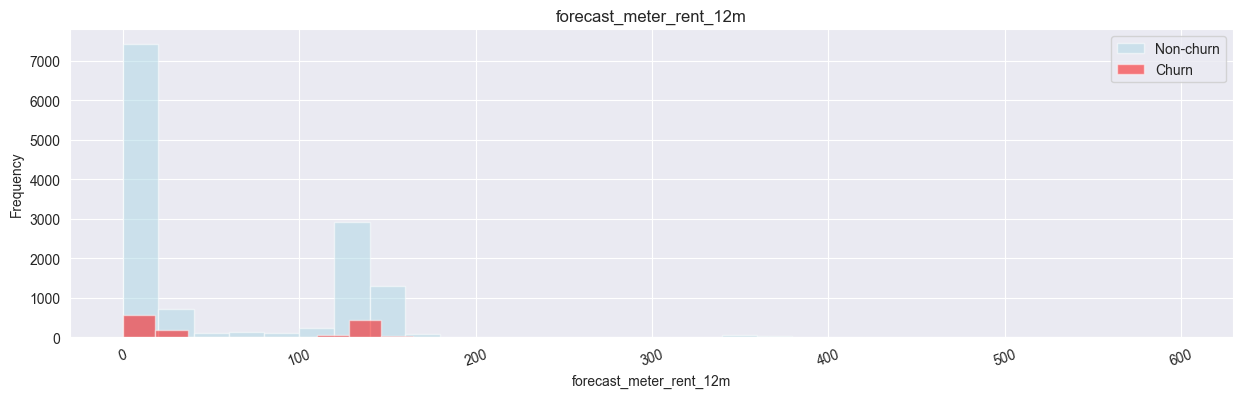

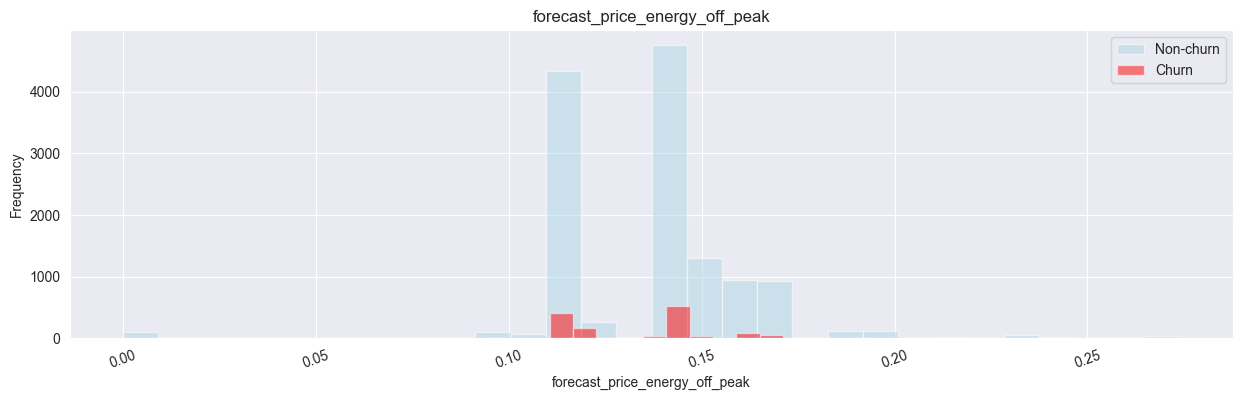

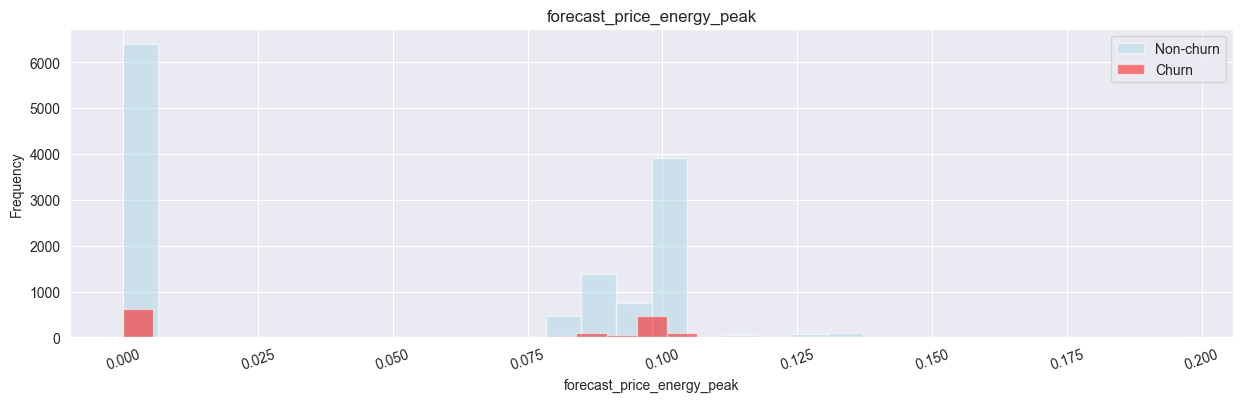

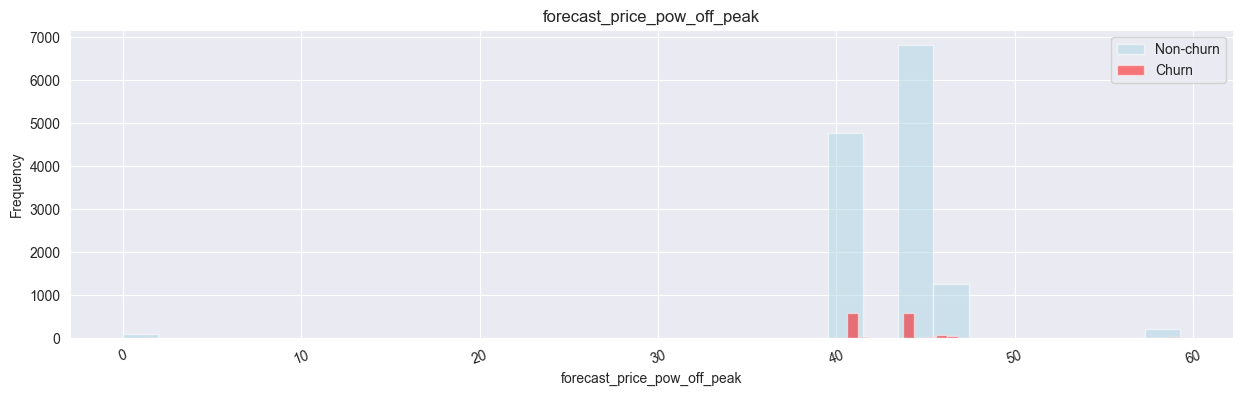

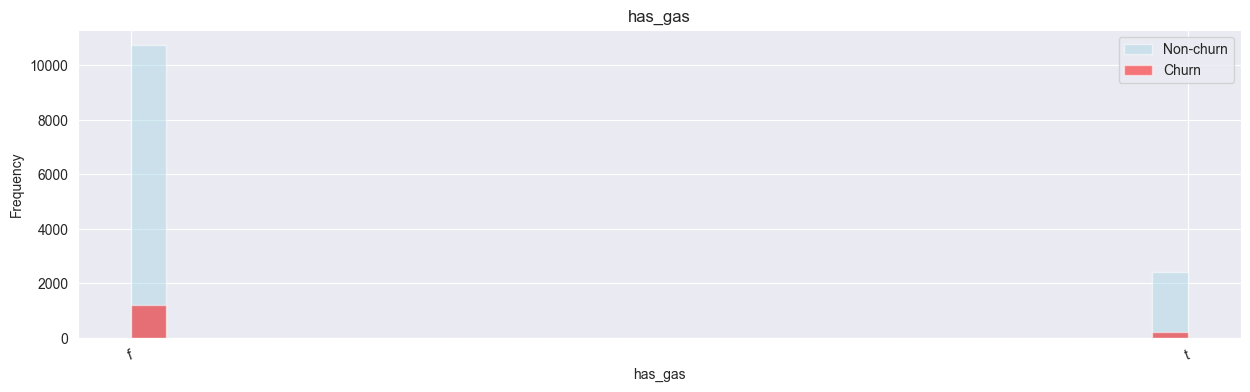

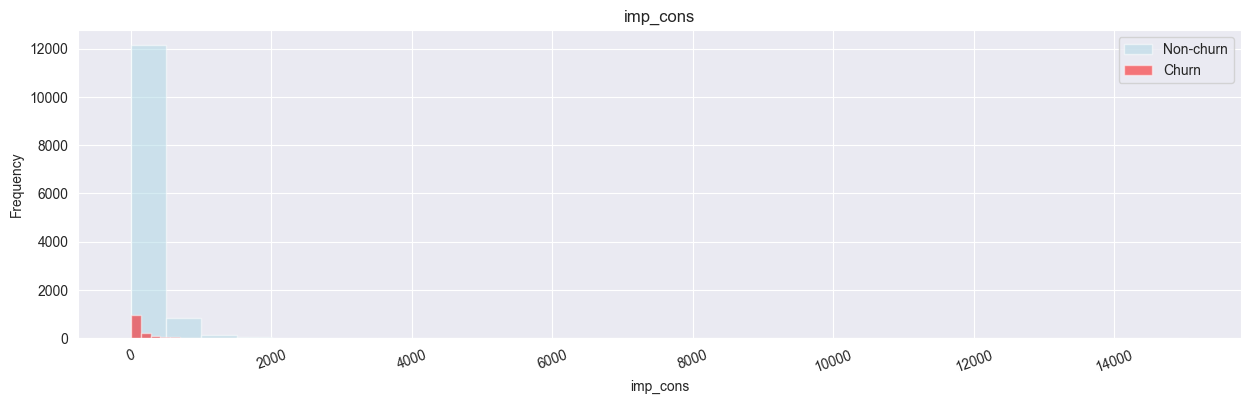

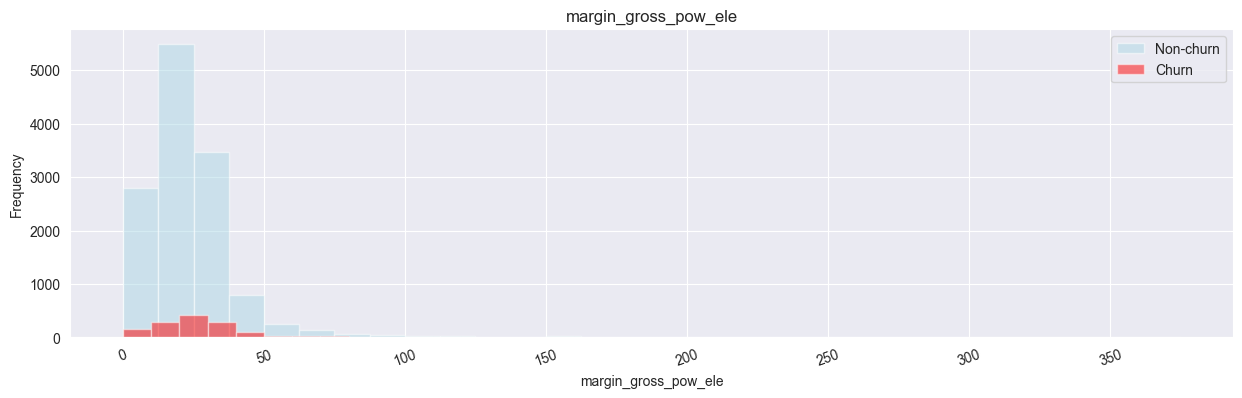

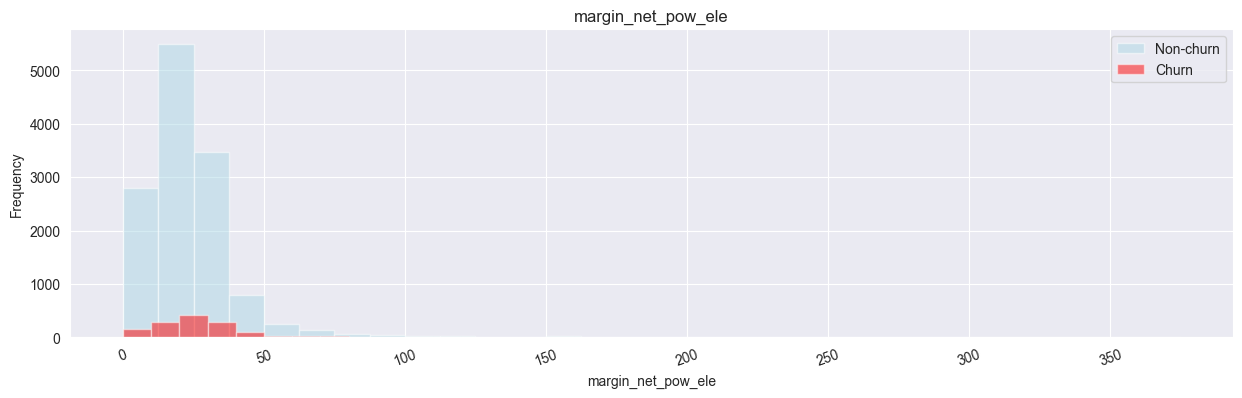

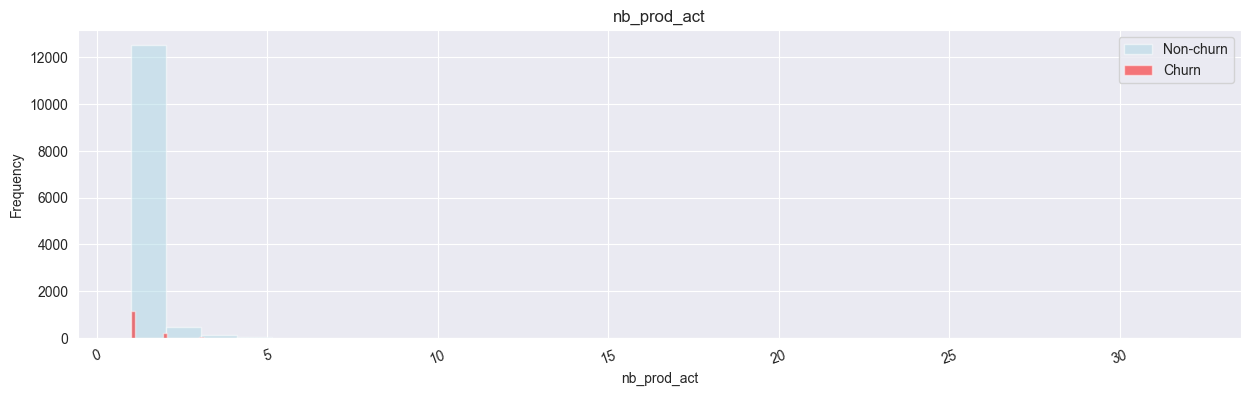

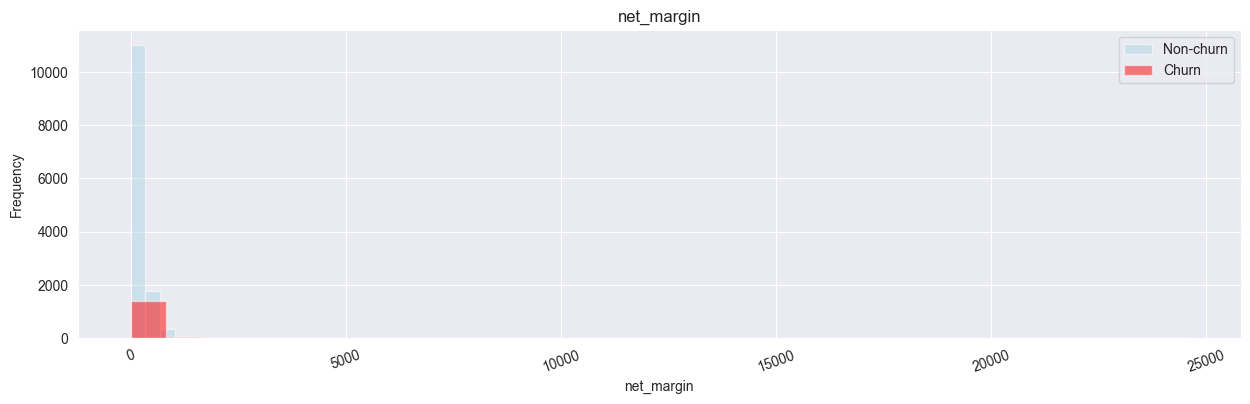

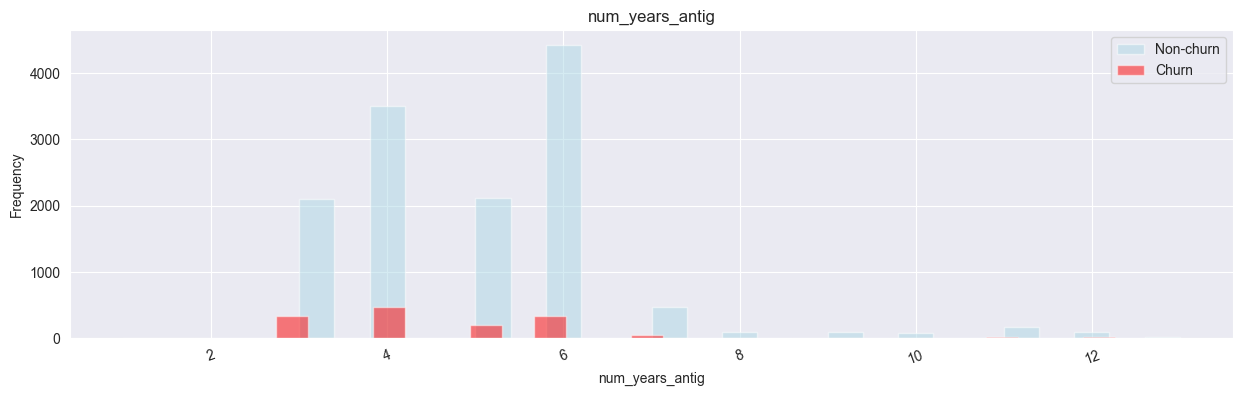

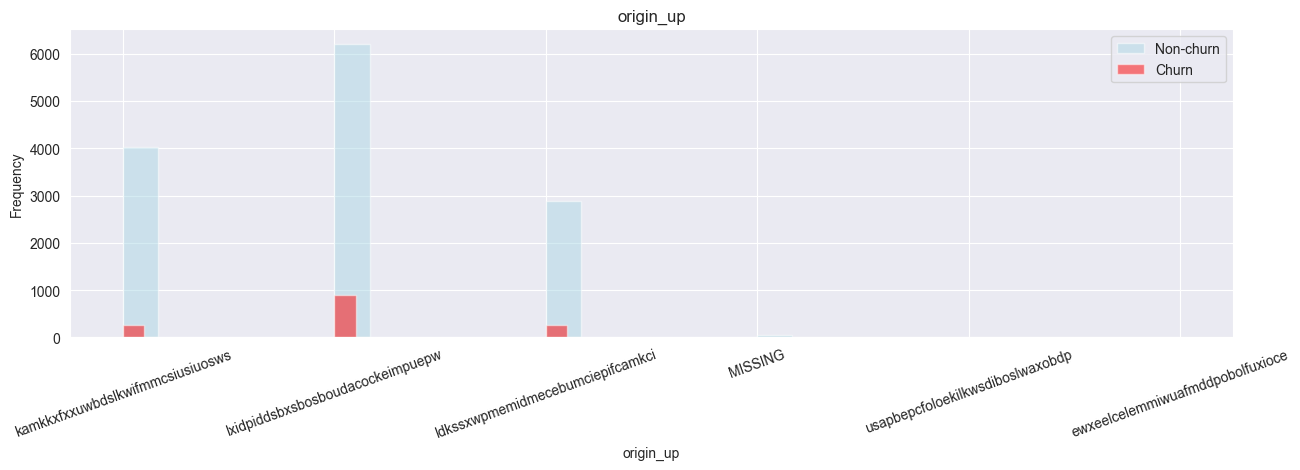

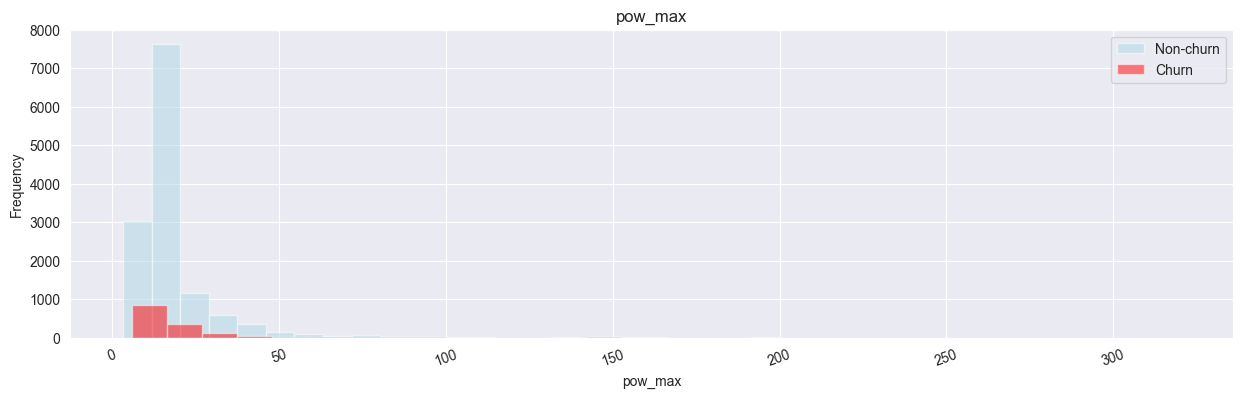

In [87]:
# Lets visualize the dataset with respect to the 'churn' column

columns = ['channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max']

for col in columns:
    fig, axs = plt.subplots(figsize=(15,4))
    axs.hist(client_df.loc[client_df['churn'] == 0, col], bins=30, alpha=0.5, color='lightblue', label='Non-churn')
    axs.hist(client_df.loc[client_df['churn'] == 1, col], bins=30, alpha=0.5, color='red', label='Churn')
    axs.set(title=col, xlabel=col, ylabel='Frequency')
    plt.xticks(rotation=20)
    axs.legend()
    
    plt.show()

In [15]:
#plt.figure(figsize=(15,4))

#sns.histplot(data=client_df, x="days_diff", hue='churn', multiple="dodge", palette="light:#5A9")
#plt.title('\n How long the customers stay before churning?')
#plt.xlabel('\n Length of contract(in days measure)')
#plt.yticks([])
#plt.axis('off')

### Exploring and visualizing the price dataset

In [16]:
# Exploring the price_df dataset

price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [17]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


**Observations**

- There are 193002 columns with data types as float and object.
- No missing values but we can visualize to make sure.
- There are some columns with dates , we need to change the data type to datetime
- We can merge both the datasets (client and price) with the 'id_column'.

In [18]:
# Change price_date column datatype to time

price_df['price_date'] = price_df['price_date'].apply(pd.to_datetime)

price_df.select_dtypes(include='datetime').head(2)

,price_date
0,2015-01-01
1,2015-02-01


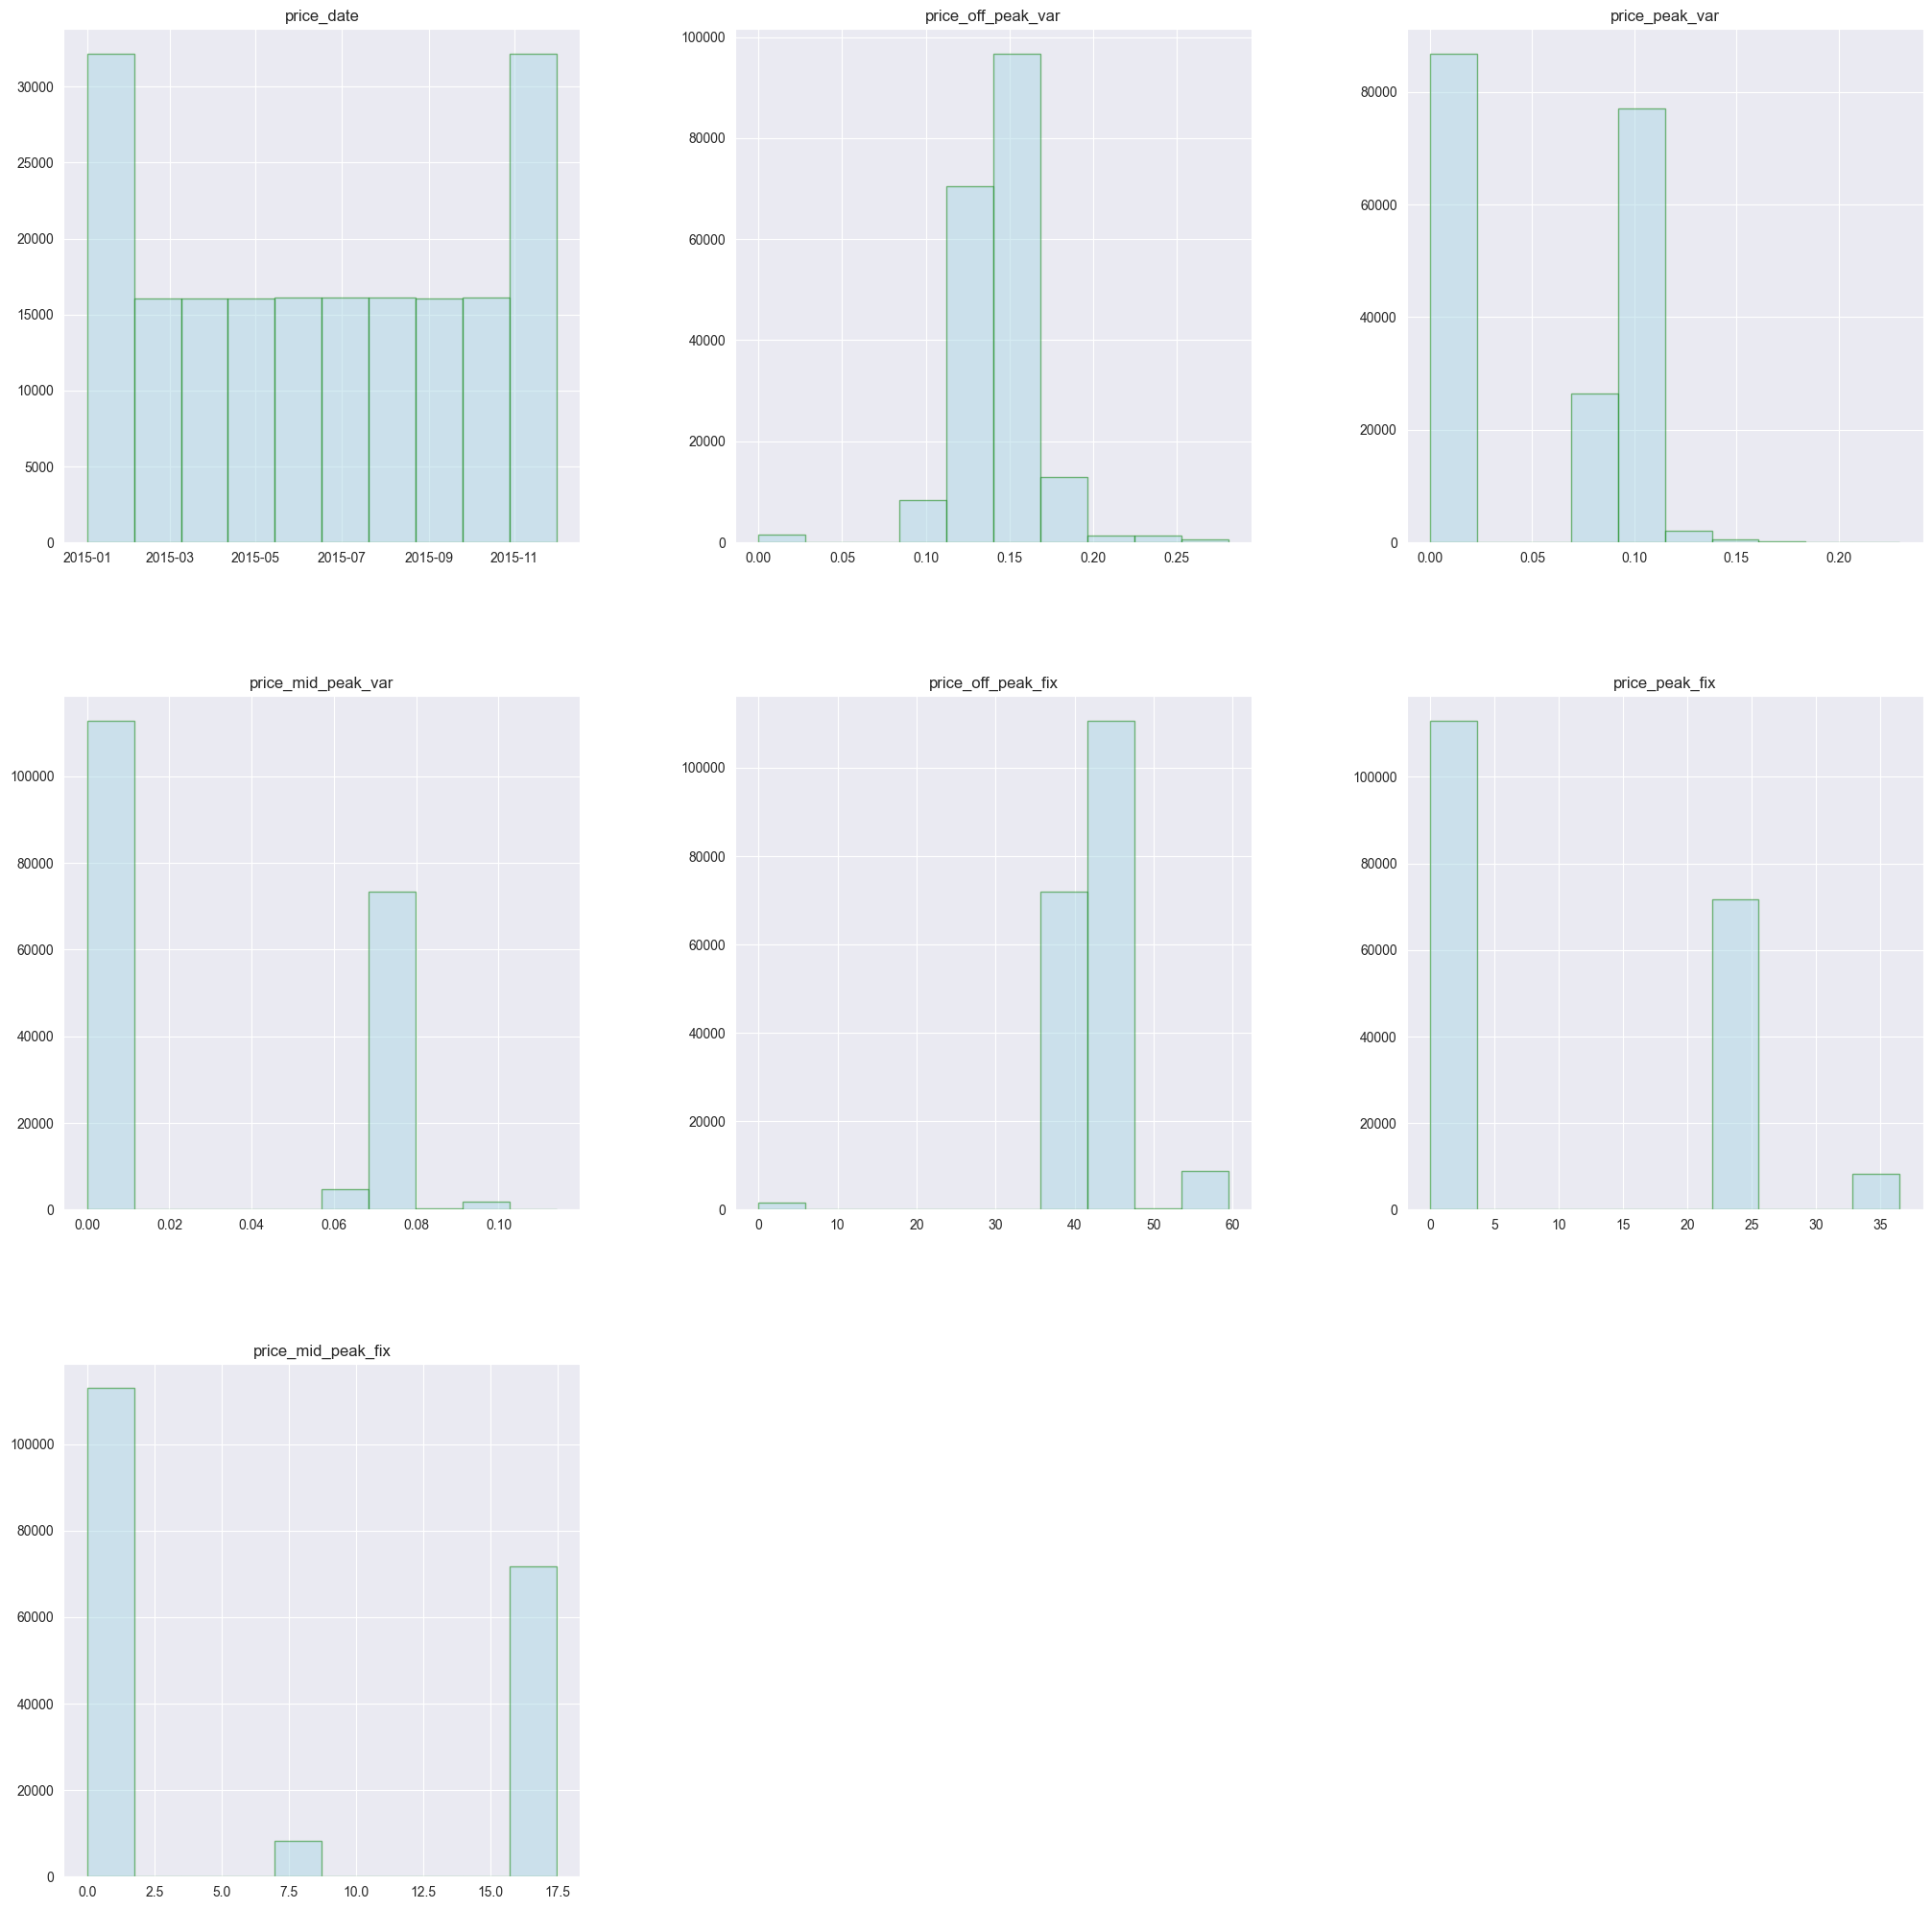

In [297]:
## Lets visualize the distribution of price for both power and energy in 2015

price_df.hist(figsize=(25,25), color = "lightblue", ec='green', alpha=0.5)
plt.show()

In [20]:
# Lets merge the datasets with a common column, id in this case

merged_df = pd.merge(client_df, price_df, on='id')
print("Before merging: The shape of client_df dataset is {} & price_df is {}".format(client_df.shape, price_df.shape))
print("After merging: The shape of merged dataset is:{}".format(merged_df.shape))


Before merging: The shape of client_df dataset is (14606, 27) & price_df is (193002, 8)
After merging: The shape of merged dataset is:(175149, 34)


<AxesSubplot:xlabel='price_date', ylabel='price_mid_peak_fix'>

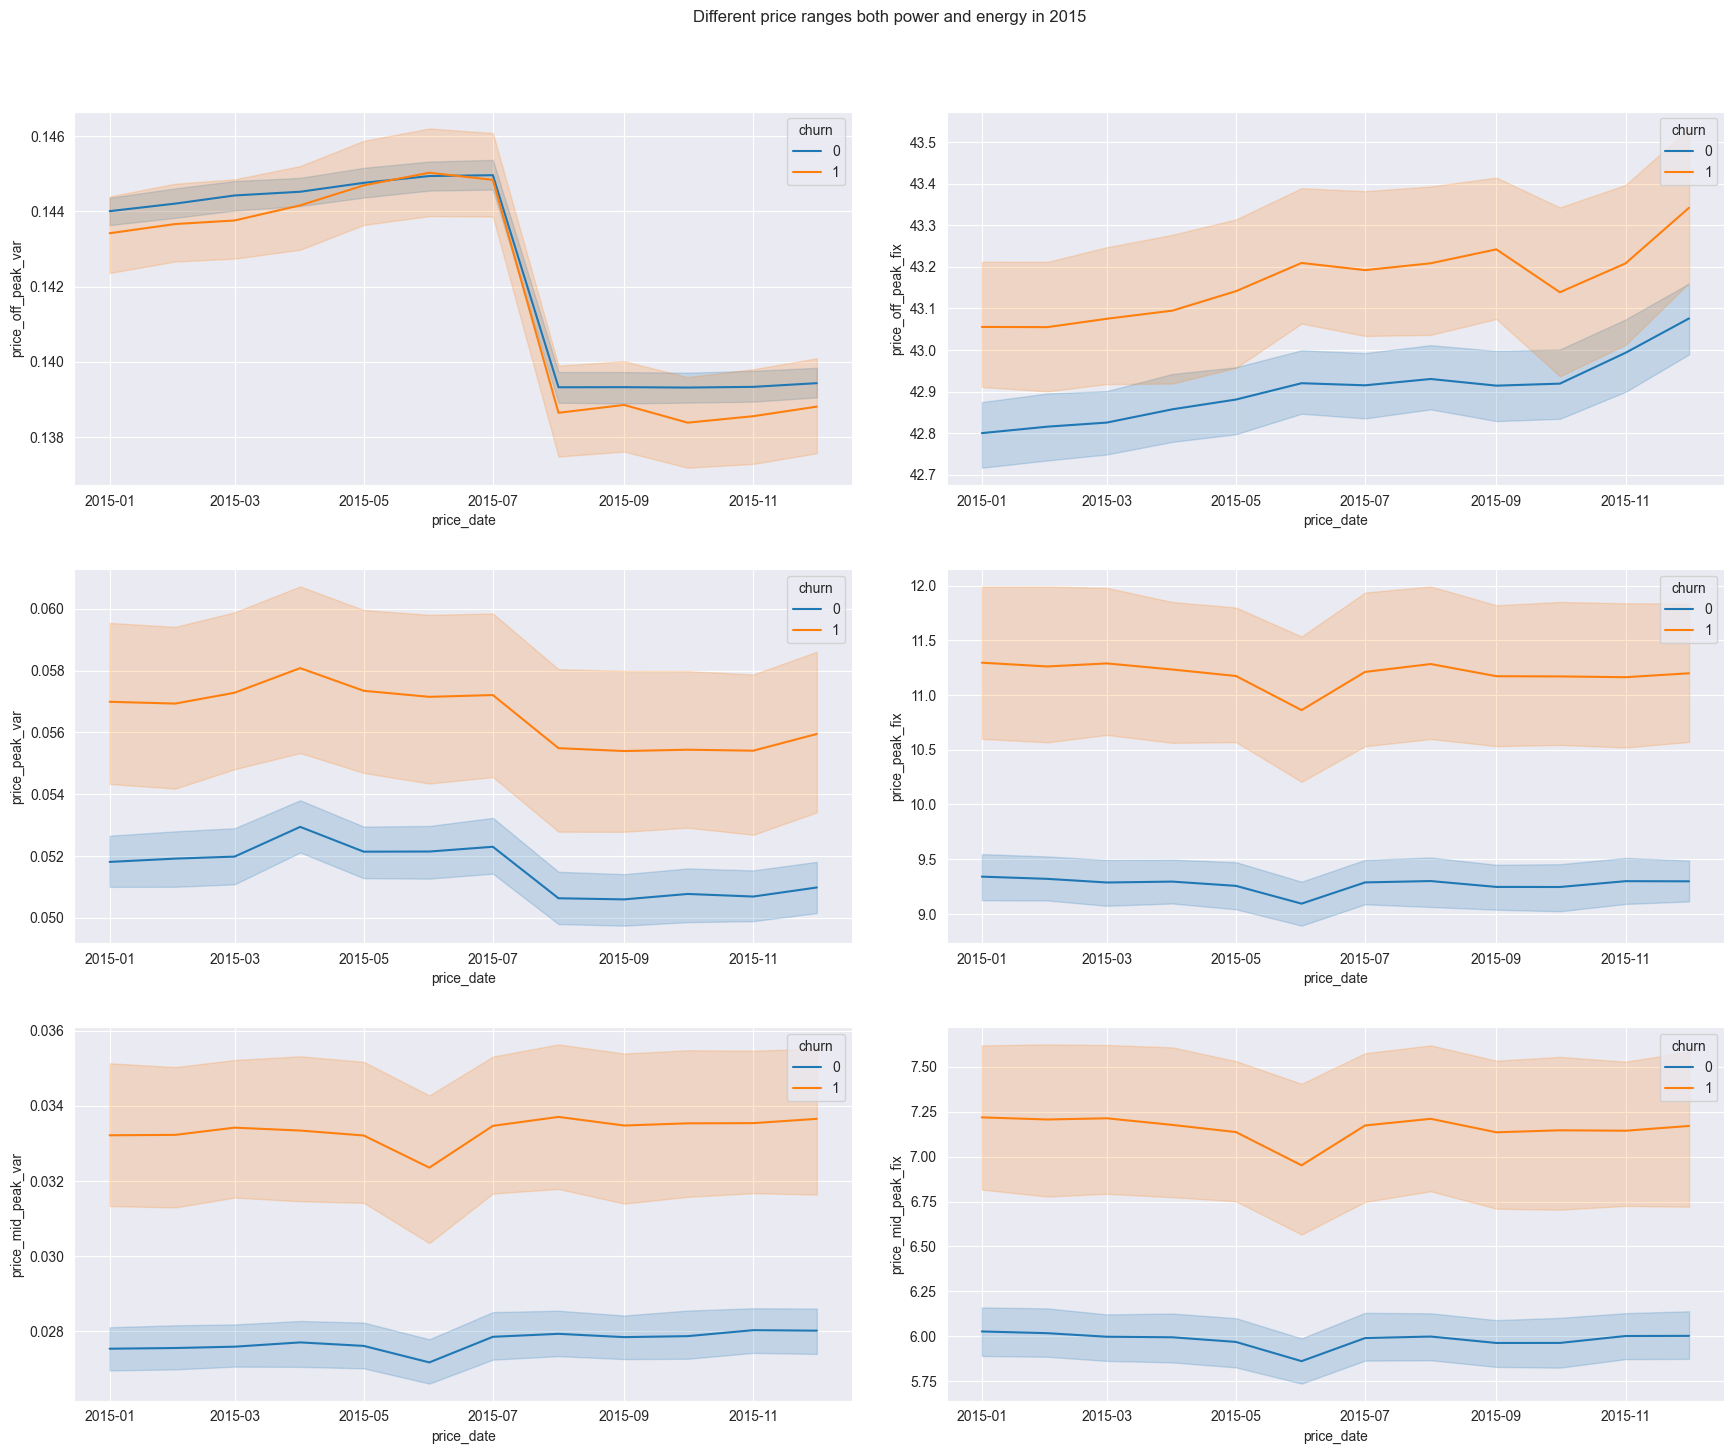

In [21]:
fig, axes = plt.subplots(3,2)
fig.suptitle('Different price ranges both power and energy in 2015')
plt.gcf().set_size_inches(18, 15)
fig.tight_layout(pad=4.0)

sns.lineplot(ax=axes[0,0], data = merged_df, x='price_date', y='price_off_peak_var', hue='churn')
sns.lineplot(ax=axes[0,1], data = merged_df, x='price_date', y='price_off_peak_fix', hue='churn' )

sns.lineplot(ax=axes[1,0], data = merged_df, x='price_date', y='price_peak_var', hue='churn')
sns.lineplot(ax=axes[1,1], data = merged_df, x='price_date', y='price_peak_fix', hue='churn')

sns.lineplot(ax=axes[2,0], data = merged_df, x='price_date', y='price_mid_peak_var', hue='churn')
sns.lineplot(ax=axes[2,1], data = merged_df, x='price_date', y='price_mid_peak_fix' , hue='churn')

### Check the skewness

In [120]:
#Lets check for skewness of the dataset

merged_df.skew().sort_values(ascending=False)

net_margin                        36.571063
forecast_cons_year                16.587522
imp_cons                          13.198335
cons_gas_12m                       9.601588
nb_prod_act                        8.639788
forecast_cons_12m                  7.159049
cons_last_month                    6.389957
cons_12m                           5.996313
pow_max                            5.787392
forecast_discount_energy           5.153648
margin_net_pow_ele                 4.472982
margin_gross_pow_ele               4.472289
churn                              2.721894
forecast_meter_rent_12m            1.503670
num_years_antig                    1.445985
price_peak_fix                     0.540461
price_mid_peak_fix                 0.518144
price_mid_peak_var                 0.505937
forecast_price_energy_peak        -0.014138
price_peak_var                    -0.023695
forecast_price_energy_off_peak    -0.120054
price_off_peak_var                -0.708908
forecast_price_pow_off_peak     

C:\Users\Nima\AppData\Local\Temp\ipykernel_25692\1341435778.py:27: RuntimeWarning: divide by zero encountered in log
  sns.histplot(np.log(array),kde = True)


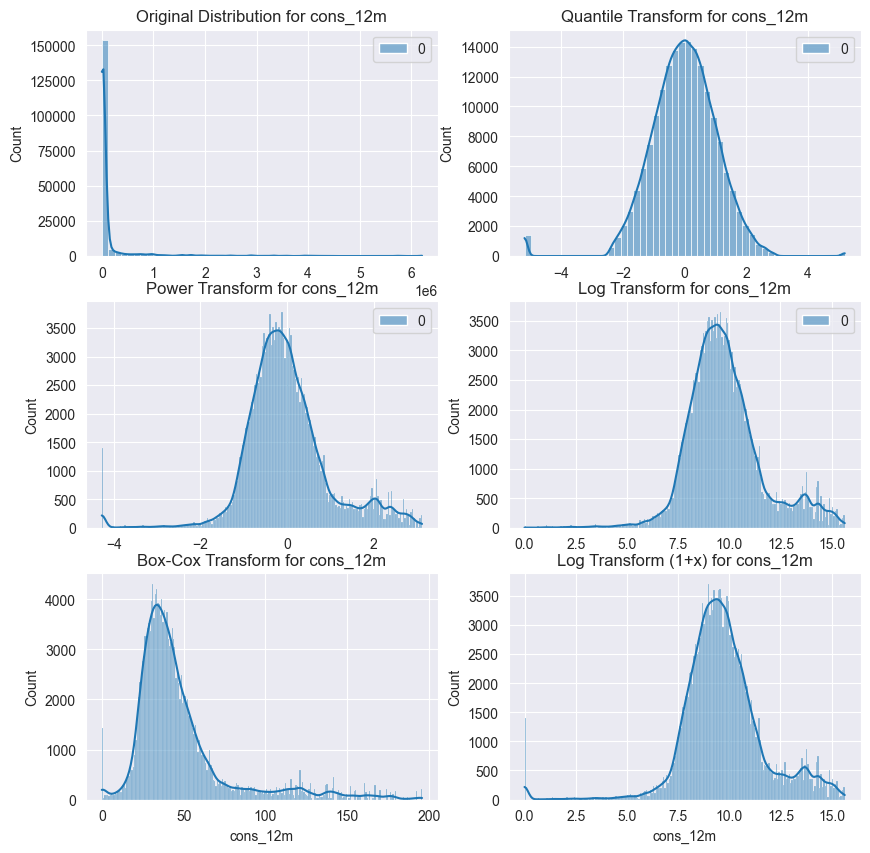

In [301]:
# this method is from the following link:
#https://yashowardhanshinde.medium.com/what-is-skewness-in-data-how-to-fix-skewed-data-in-python-a792e98c0fa6

from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from scipy import stats
cols1 = ["cons_12m"]
def test_transformers(columns):
    pt = PowerTransformer()
    qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
    #fitted_data, fitted_lambda = stats.boxcox(original_data)
    fig = plt.figure(figsize=(10,10))
    
    for i in columns:
        array = np.array(merged_df[i]).reshape(-1, 1)
        y = pt.fit_transform(array)
        x = qt.fit_transform(array)
        plt.subplot(3,2,1)
        sns.histplot(array,bins = 50, kde = True)
        plt.title(f"Original Distribution for {i}")
        plt.subplot(3,2,2)
        sns.histplot(x, bins = 50, kde = True)
        plt.title(f"Quantile Transform for {i}")
        plt.subplot(3,2,3)
        sns.histplot(y,kde = True)
        plt.title(f"Power Transform for {i}")
        plt.subplot(3,2,4)
        sns.histplot(np.log(array),kde = True)
        plt.title(f"Log Transform for {i}")
        plt.subplot(3,2,5)
        sns.histplot(merged_df[i].apply(lambda x: boxcox1p(x,0.25)),kde = True)
        plt.title(f"Box-Cox Transform for {i}")
        plt.subplot(3,2,6)
        sns.histplot(merged_df[i].apply(lambda x:np.log(1+x)),kde = True)
        plt.title(f"Log Transform (1+x) for {i}")
        
test_transformers(cols1)


In [311]:
skew_df = pd.DataFrame()
skew_df['original_distribution']= numerical_df.skew()
skew_df['log_transformation'] = np.log(numerical_df).skew()
skew_df['box-cox_transformation'] = numerical_df.apply(lambda x: boxcox1p(x,0.25)).skew()
skew_df['log_transformation(1+x)'] = numerical_df.apply(lambda x:np.log(1+x)).skew()
skew_df

std_df = pd.DataFrame()
std_df['original_distribution_std']= numerical_df.std()
std_df['log_transformation_std'] = np.log(numerical_df).std()
std_df['box-cox_transformation_std'] = numerical_df.apply(lambda x: boxcox1p(x,0.25)).std()
std_df['log_transformation(1+x)_std'] = numerical_df.apply(lambda x:np.log(1+x)).std()
std_df


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,original_distribution,log_transformation,box-cox_transformation,log_transformation(1+x)
cons_12m,5.997308,NaN,2.187827,-0.379541
cons_gas_12m,9.597530,NaN,3.023275,1.875725
cons_last_month,6.391407,NaN,1.615108,-0.190697
forecast_cons_12m,7.155853,NaN,-0.043867,-2.032752
forecast_cons_year,16.587990,NaN,0.375273,-0.118649
...,...,...,...,...
nb_prod_act,8.636878,1.913936,2.619299,2.247376
net_margin,36.569515,NaN,0.265984,-0.969492
num_years_antig,1.446214,0.222288,0.601267,0.376138
pow_max,5.786785,1.731308,2.334787,1.804466


C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,original_distribution_std,log_transformation_std,box-cox_transformation_std,log_transformation(1+x)_std
cons_12m,573465.264198,NaN,30.009091,2.036672
cons_gas_12m,162973.059057,NaN,24.110995,3.953703
cons_last_month,64364.196422,NaN,20.717380,4.073975
forecast_cons_12m,2387.571531,NaN,7.177970,1.574028
forecast_cons_year,3247.786255,NaN,11.774067,3.649566
...,...,...,...,...
nb_prod_act,0.709774,0.354630,0.288417,0.220889
net_margin,311.798130,NaN,3.826196,1.270646
num_years_antig,1.611749,0.302139,0.394107,0.250075
pow_max,13.534743,0.439405,0.948831,0.419233


### Visualize the outliers

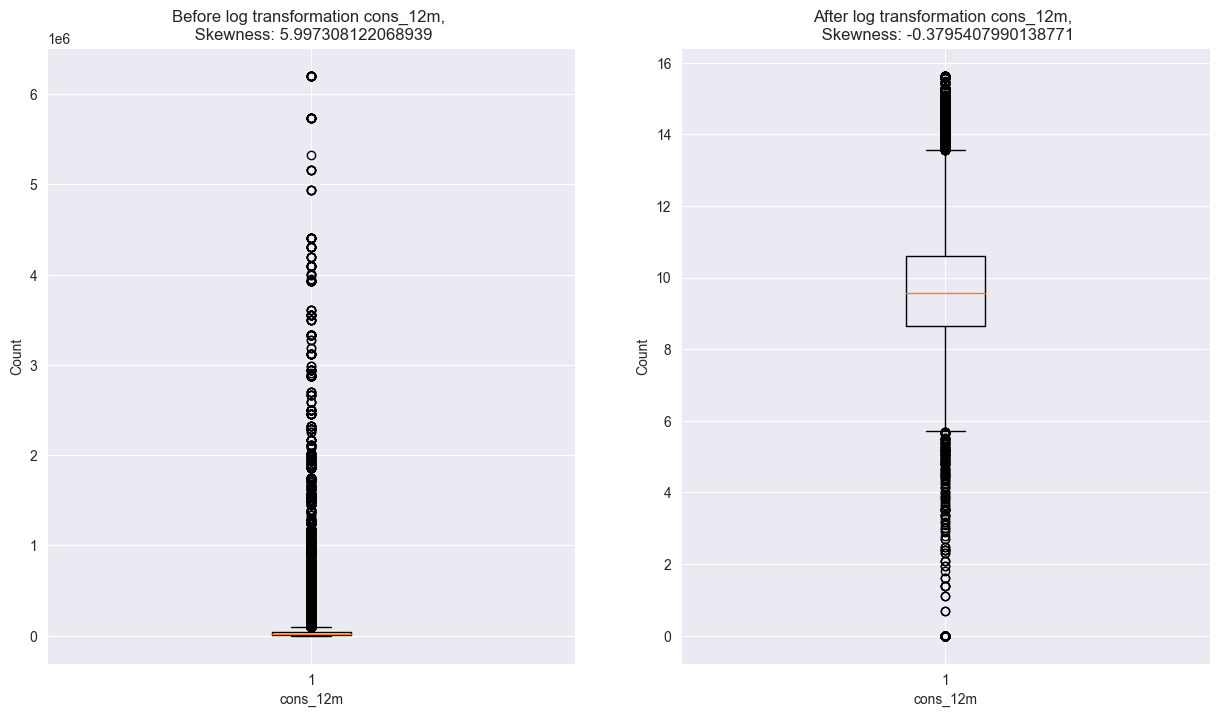

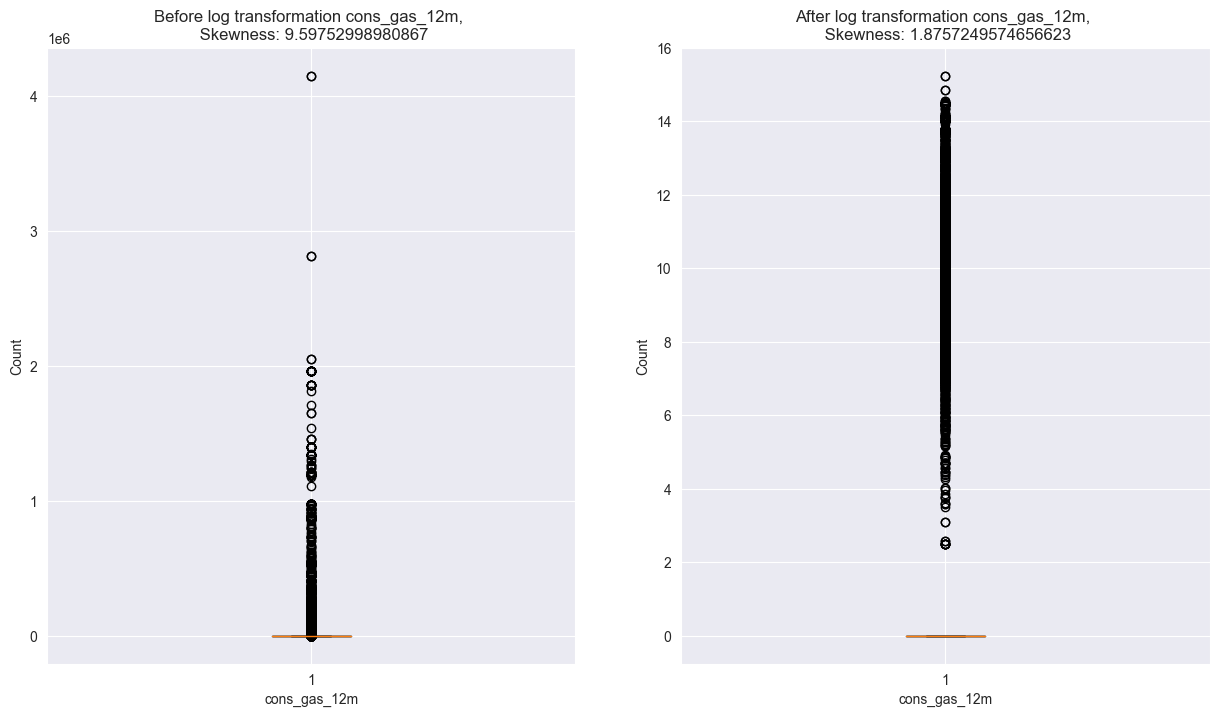

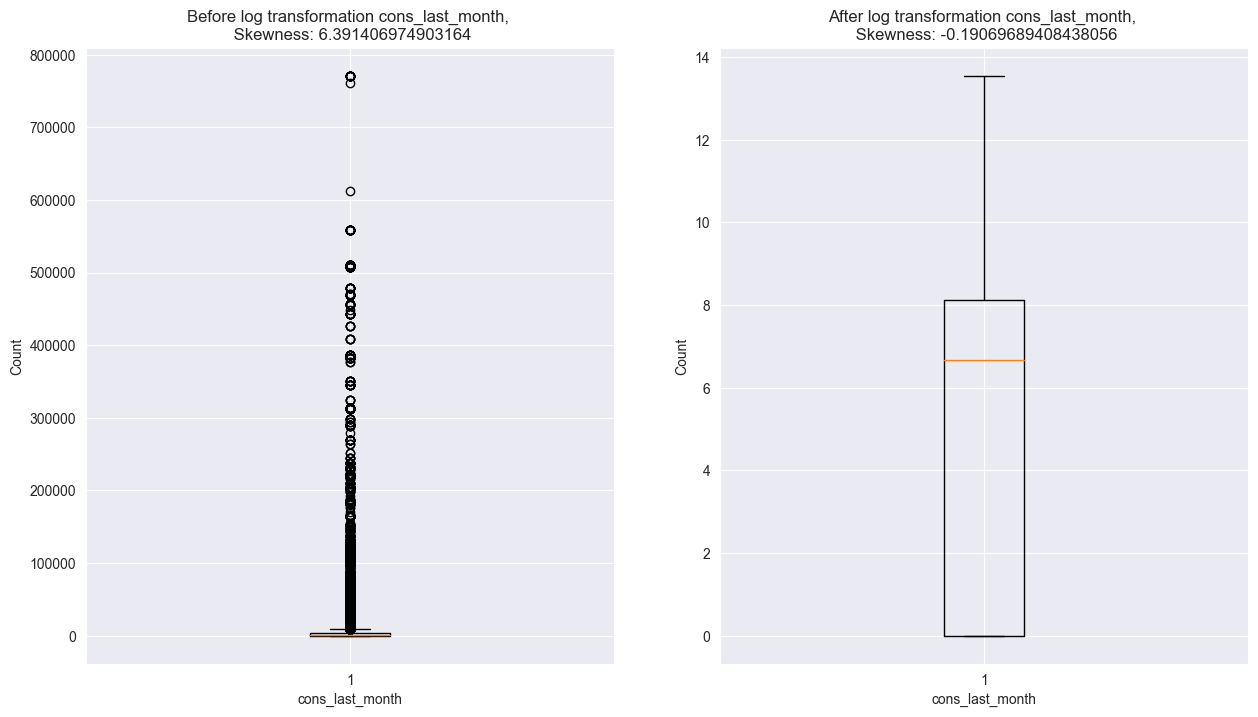

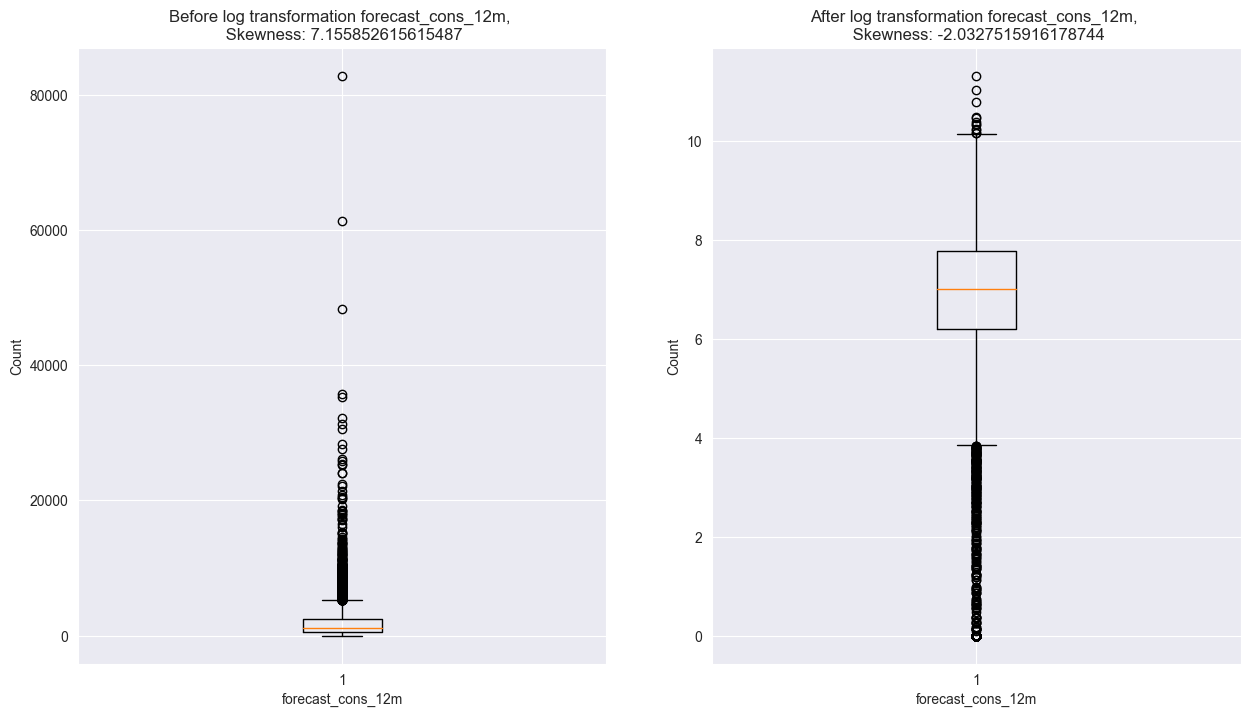

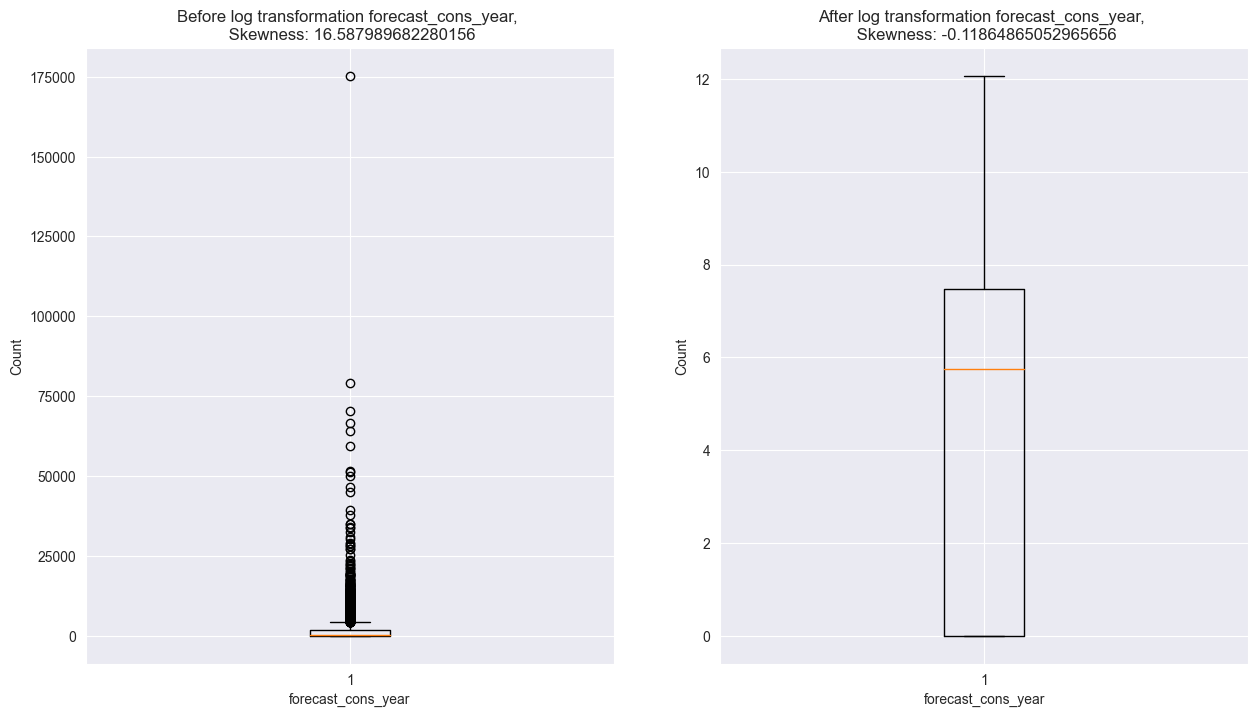

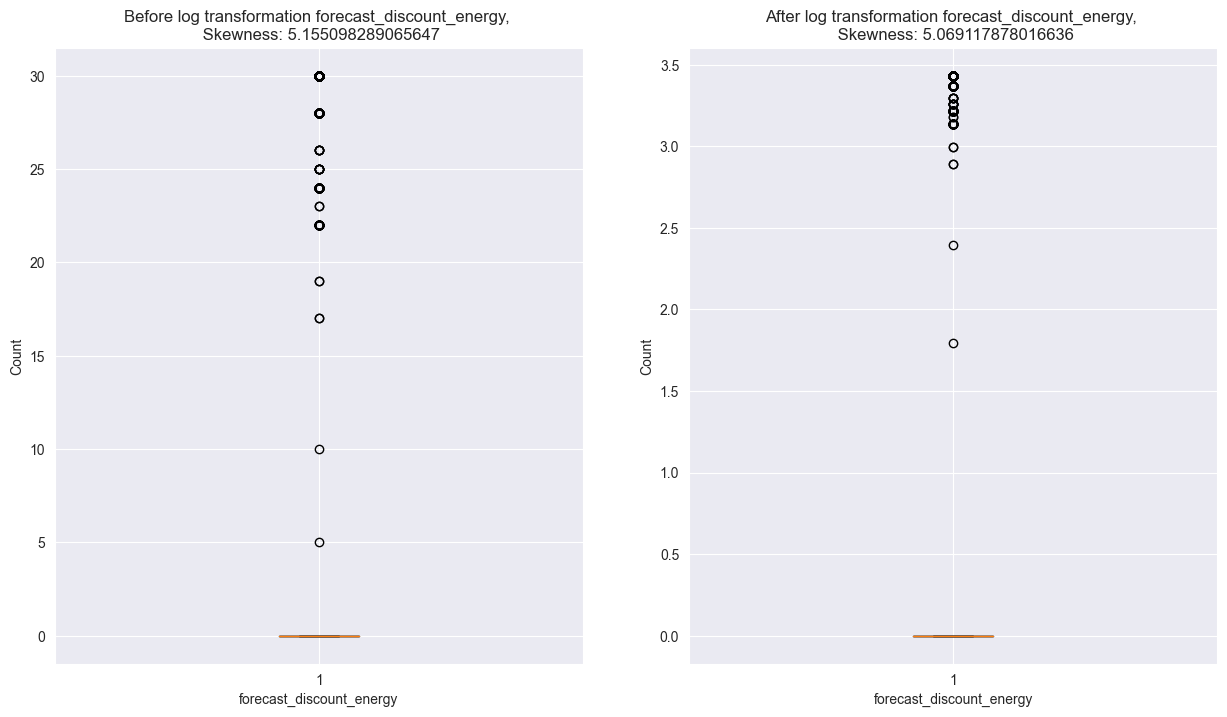

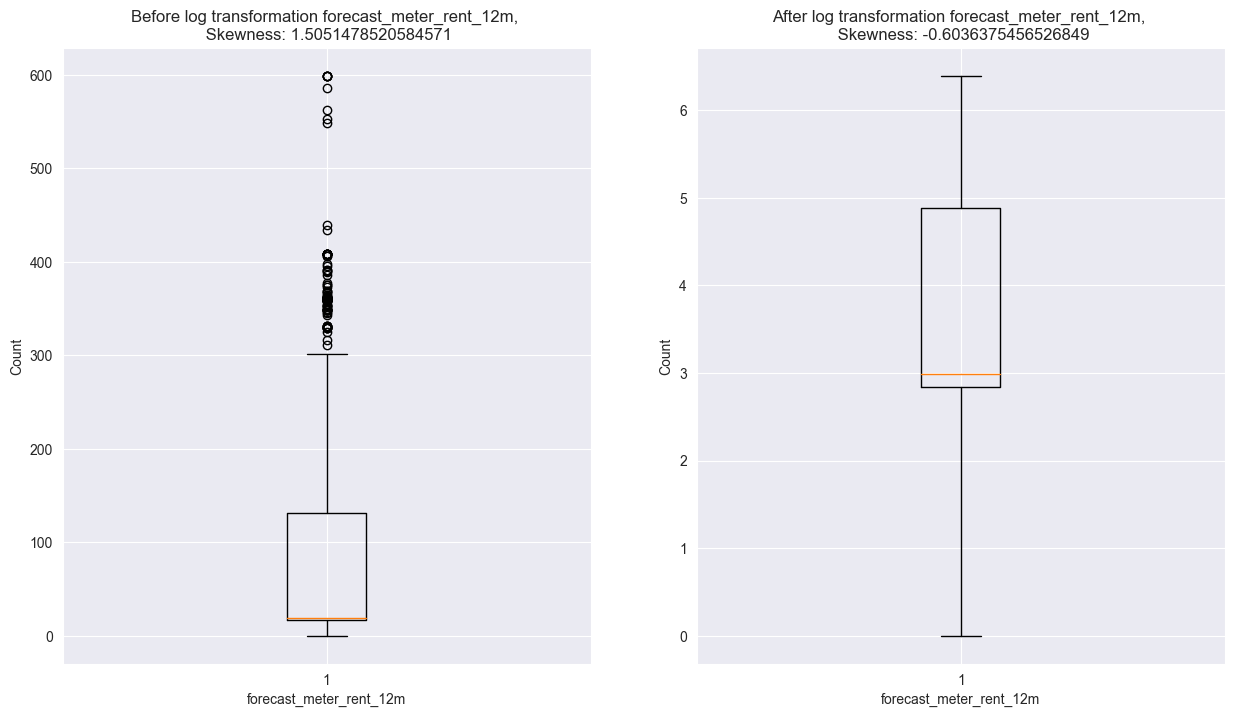

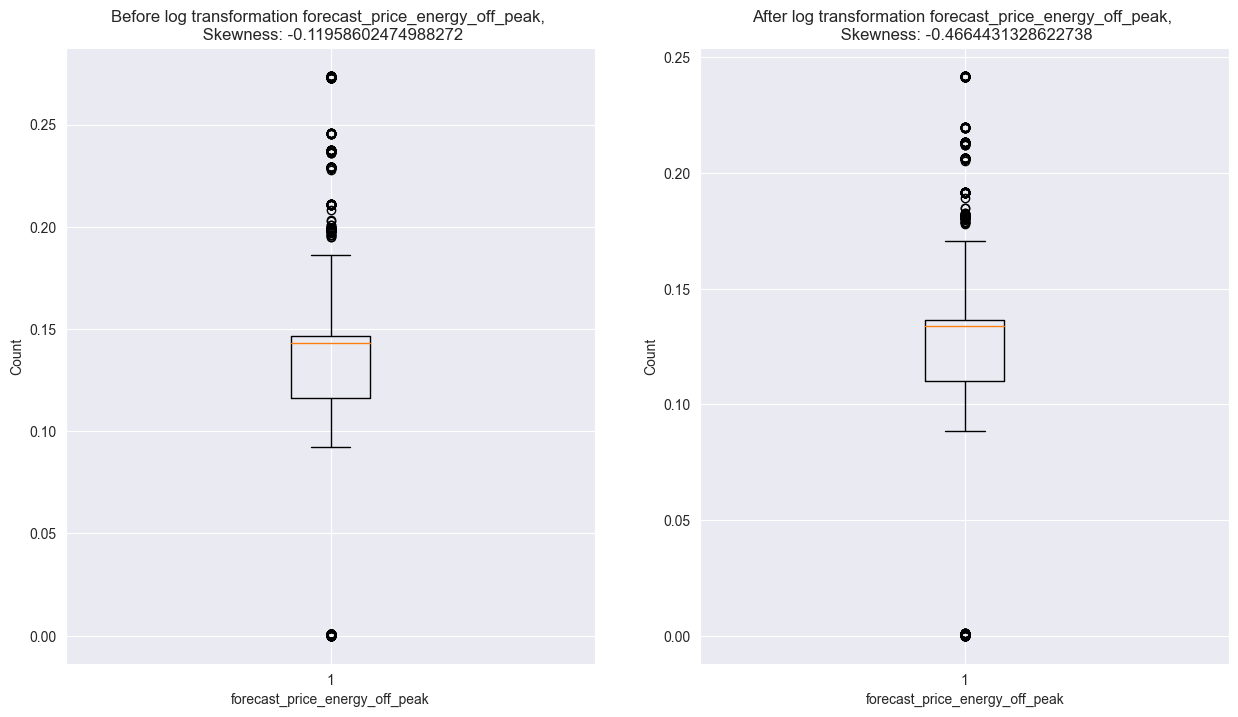

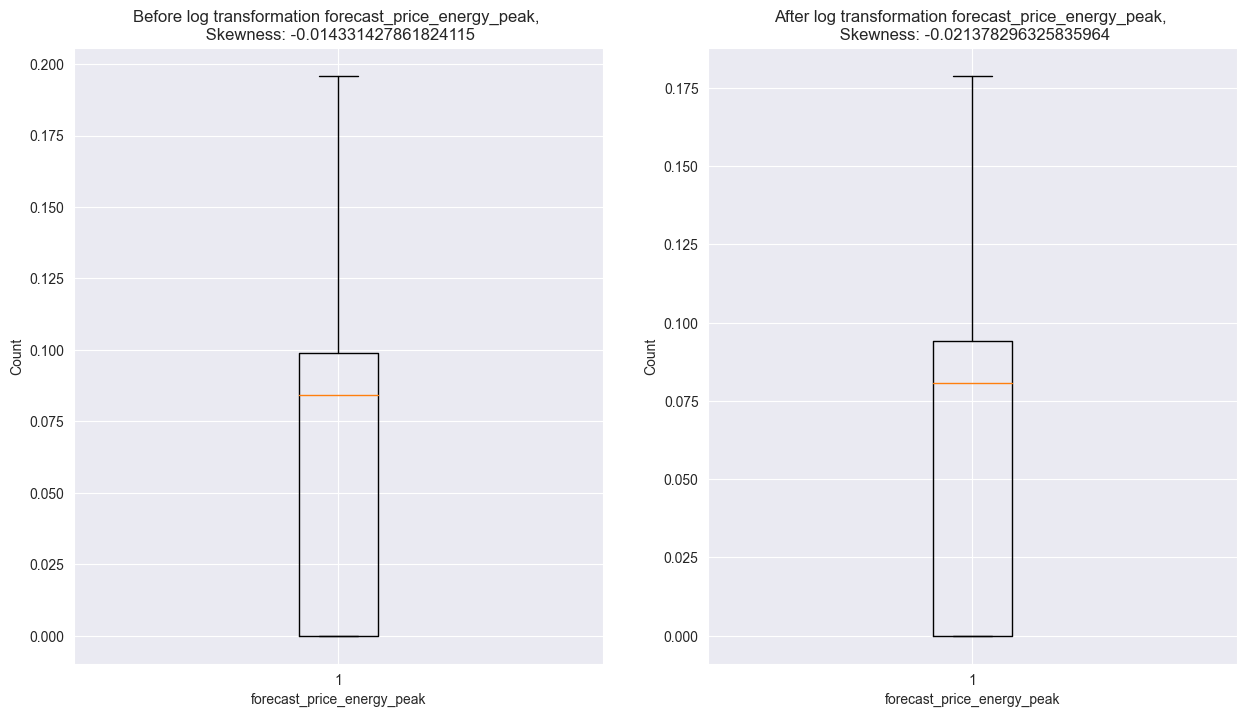

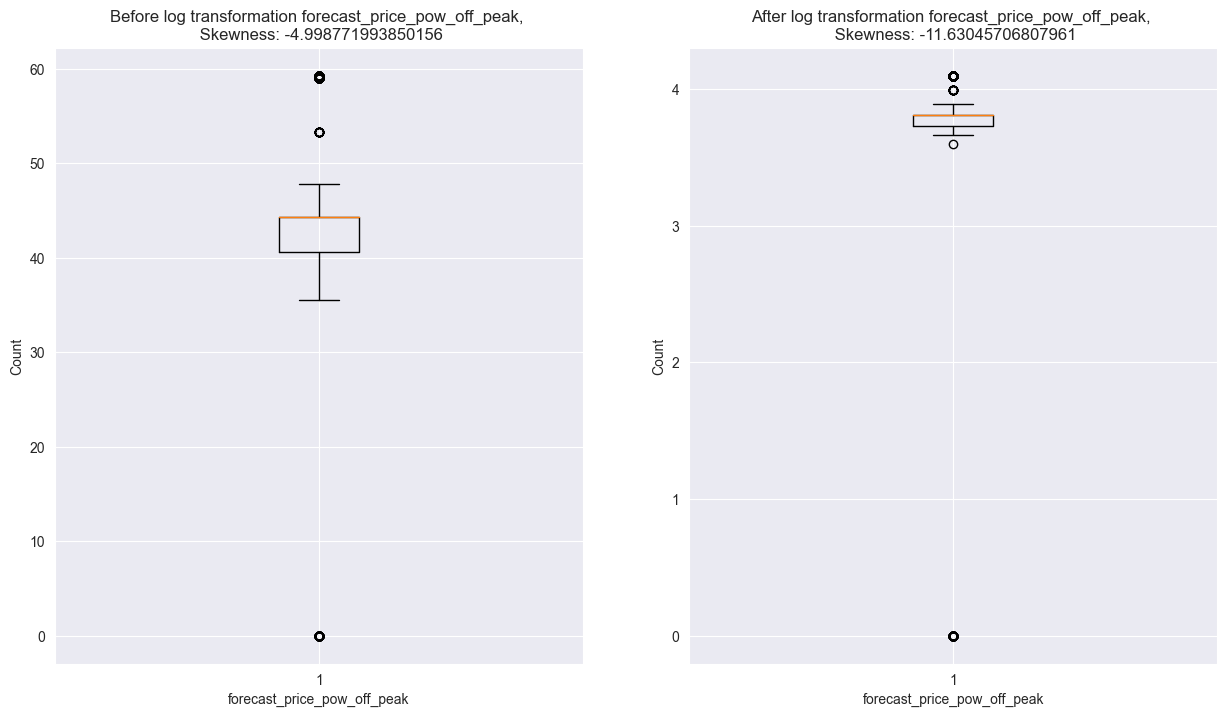

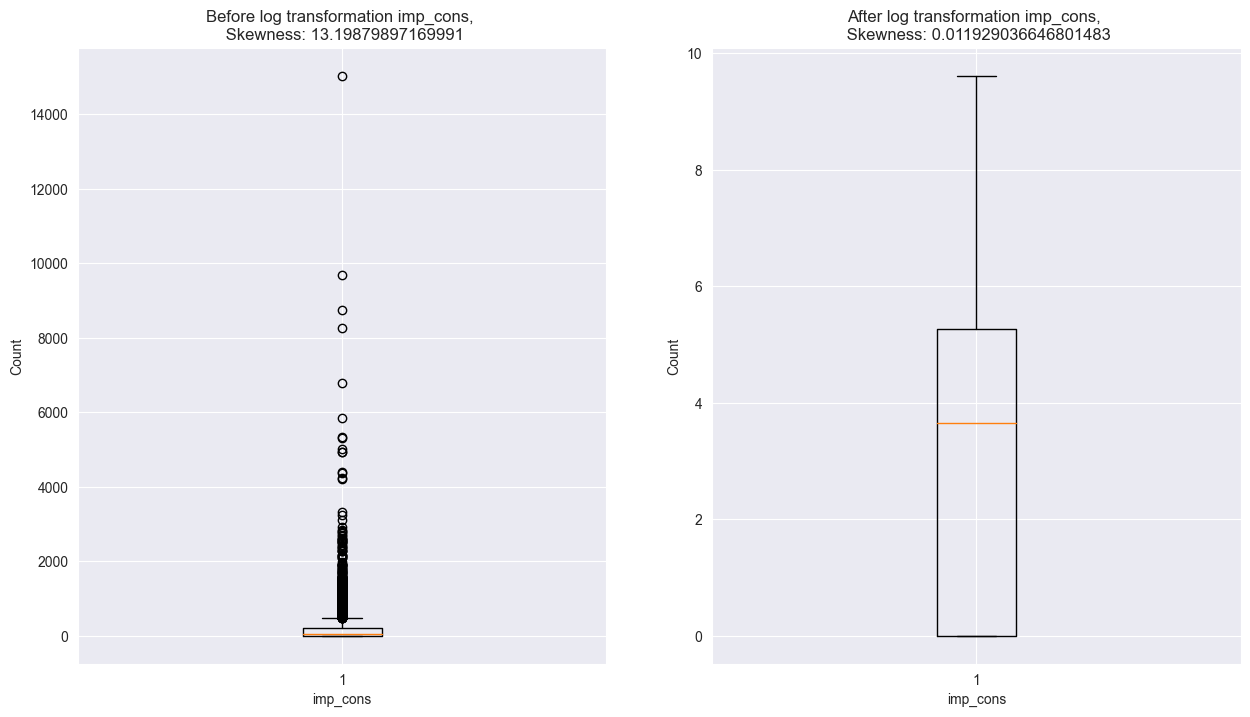

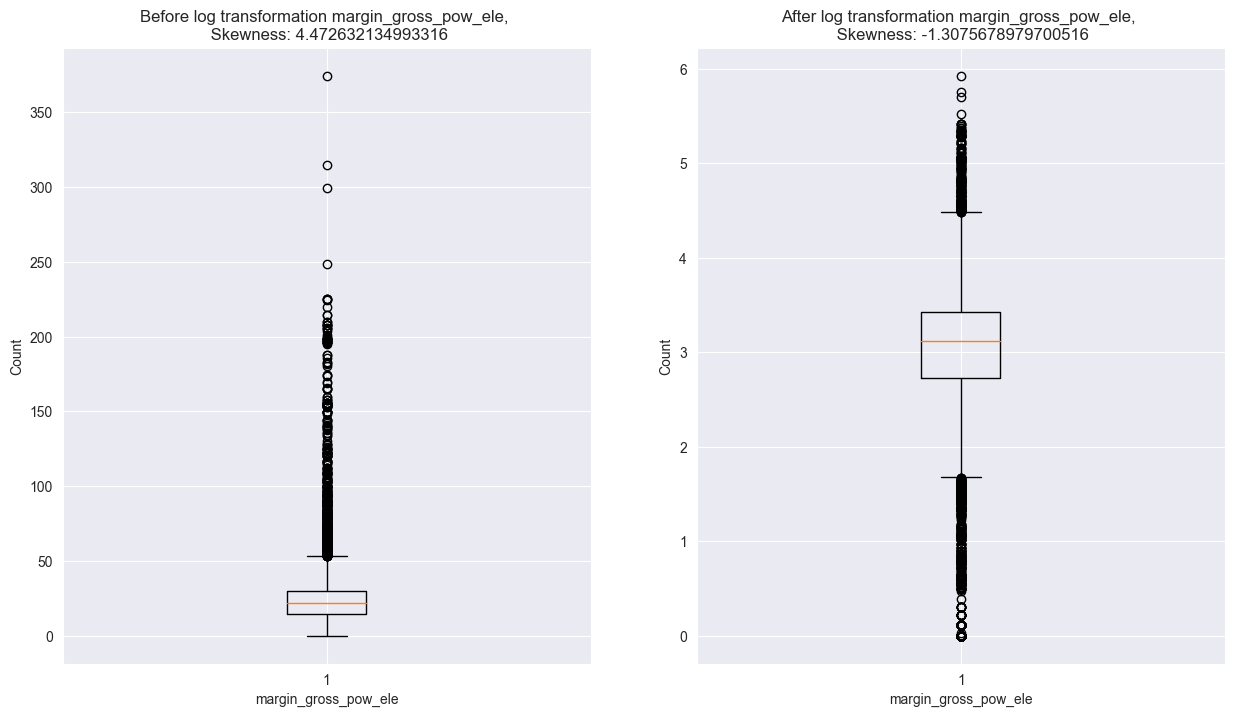

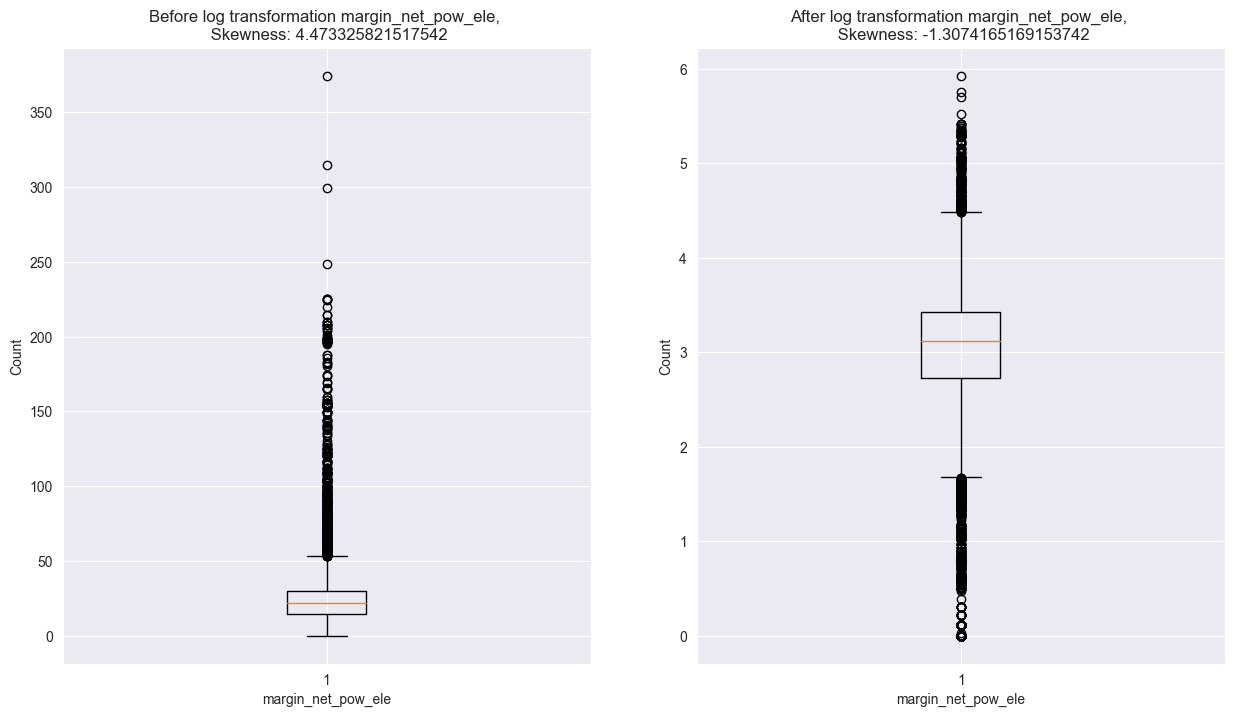

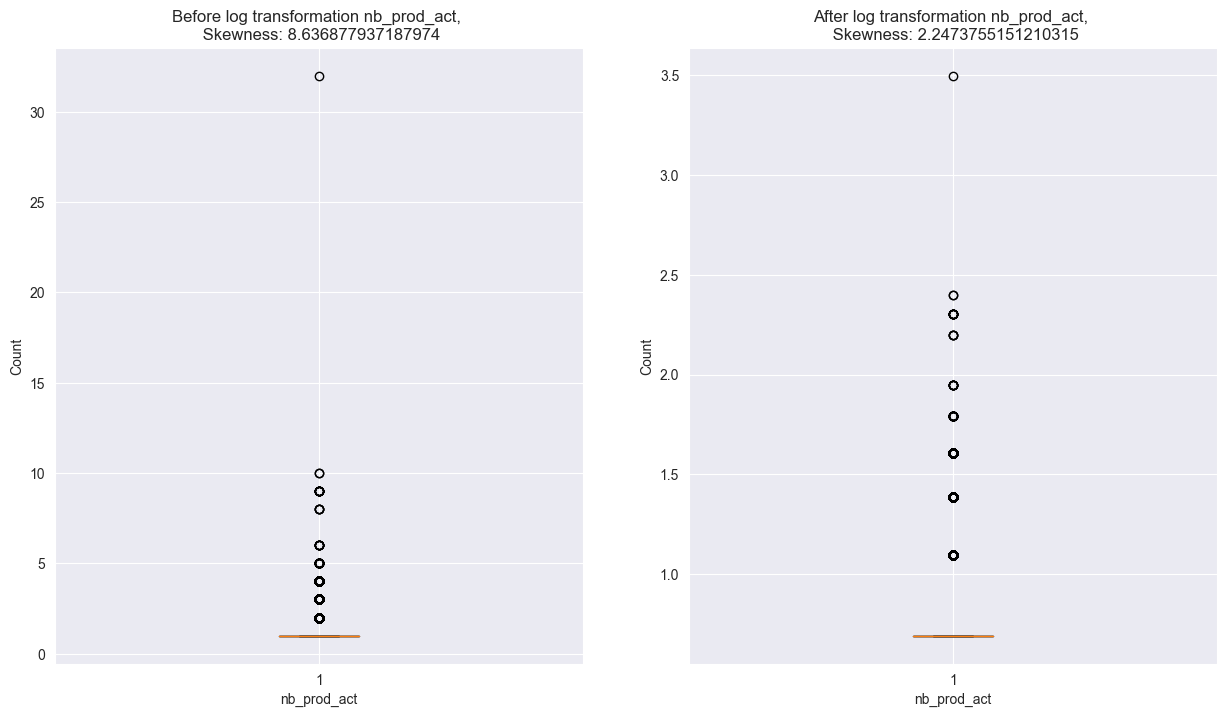

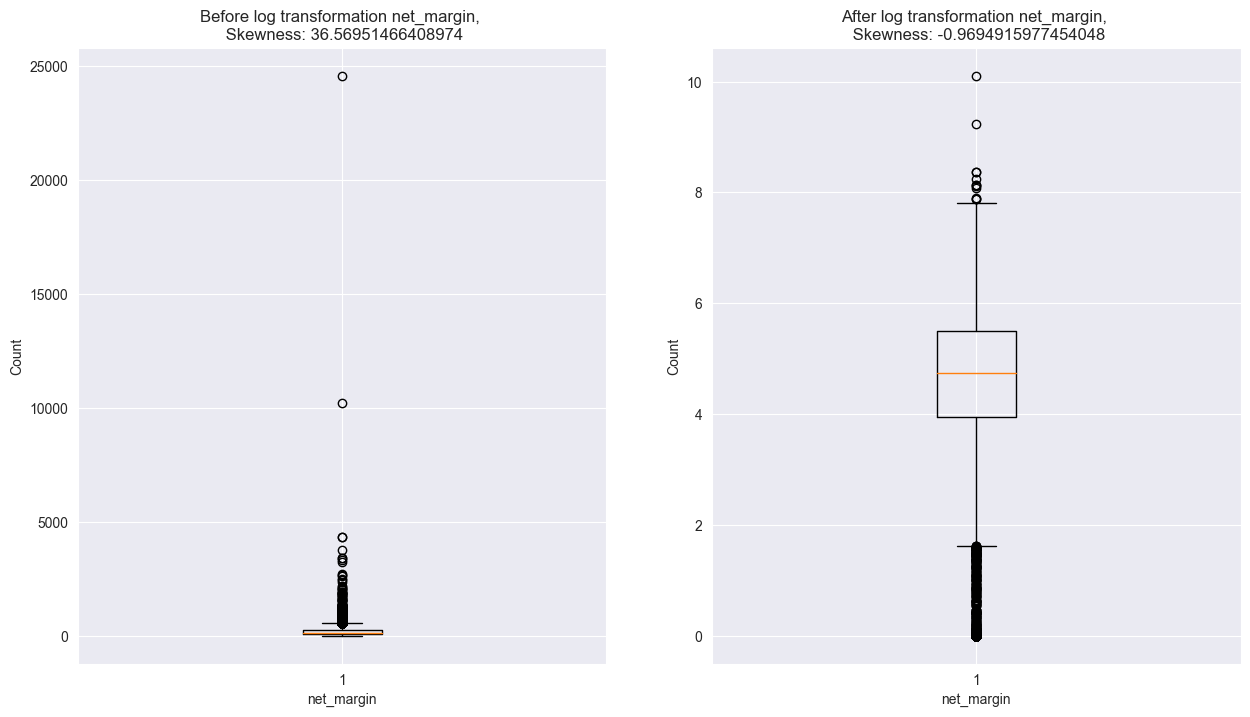

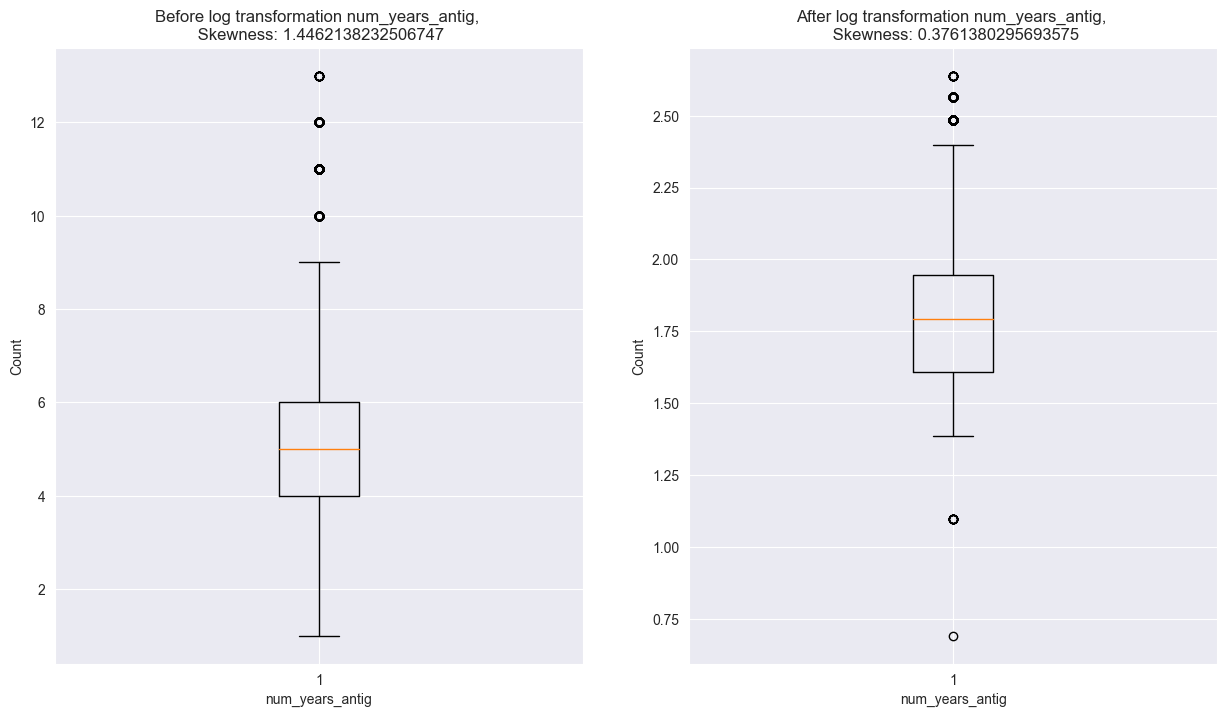

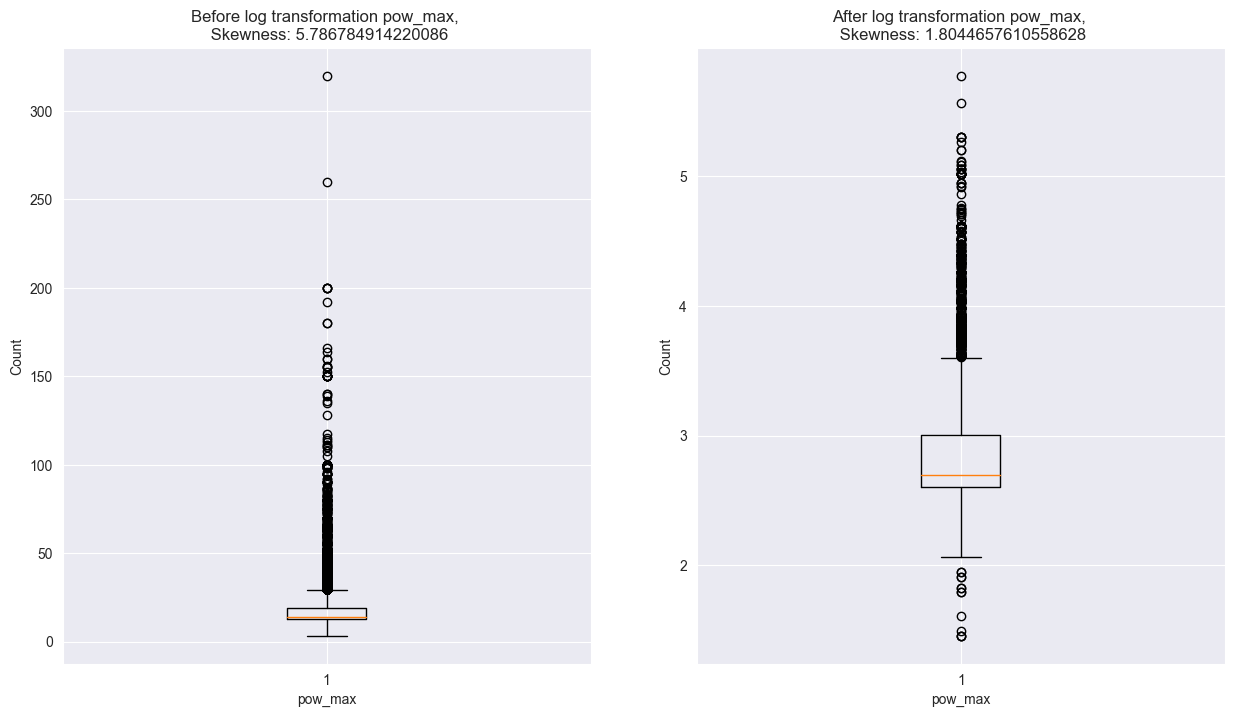

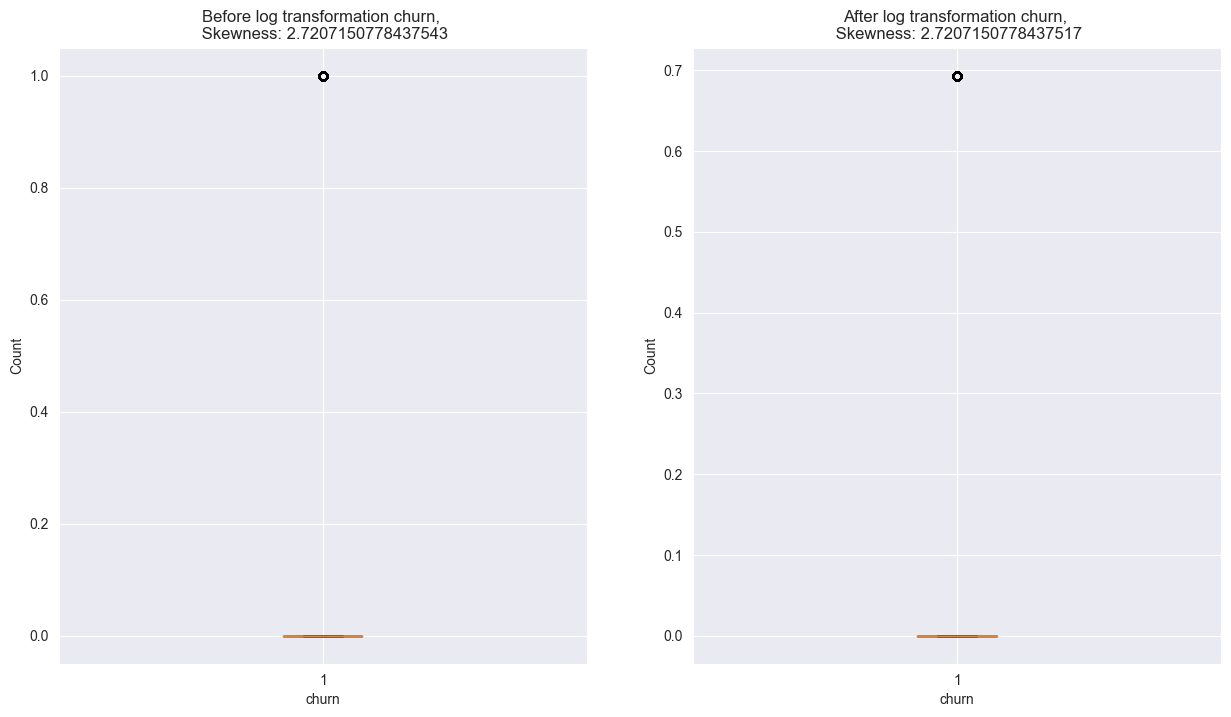

In [251]:
numerical_df = client_df.select_dtypes(include = np.number).drop('days_diff', axis=1)

# To visualize the outliers
for col in numerical_df.columns:
    fig, ax = plt.subplots(ncols = 2, figsize=(15, 8))
    ax[0].boxplot(numerical_df[col])
    ax[0].set(title=('Before log transformation {}, \n Skewness: {}'.format(col,numerical_df[col].skew())), xlabel=col, ylabel='Count')

    ax[1].boxplot(np.log1p(numerical_df[col]))
    ax[1].set(title=('After log transformation {}, \n Skewness: {}'.format(col,np.log1p(numerical_df[col]).skew())),xlabel=col,ylabel='Count')  

In [118]:
After_T = np.log1p(numerical_df).skew().sort_values(ascending=False)

forecast_discount_energy           5.069118
churn                              2.720715
nb_prod_act                        2.247376
cons_gas_12m                       1.875725
pow_max                            1.804466
num_years_antig                    0.376138
imp_cons                           0.011929
forecast_price_energy_peak        -0.021378
forecast_cons_year                -0.118649
cons_last_month                   -0.190697
cons_12m                          -0.379541
forecast_price_energy_off_peak    -0.466443
forecast_meter_rent_12m           -0.603638
net_margin                        -0.969492
margin_net_pow_ele                -1.307417
margin_gross_pow_ele              -1.307568
forecast_cons_12m                 -2.032752
forecast_price_pow_off_peak      -11.630457
dtype: float64

### Correlation analysis

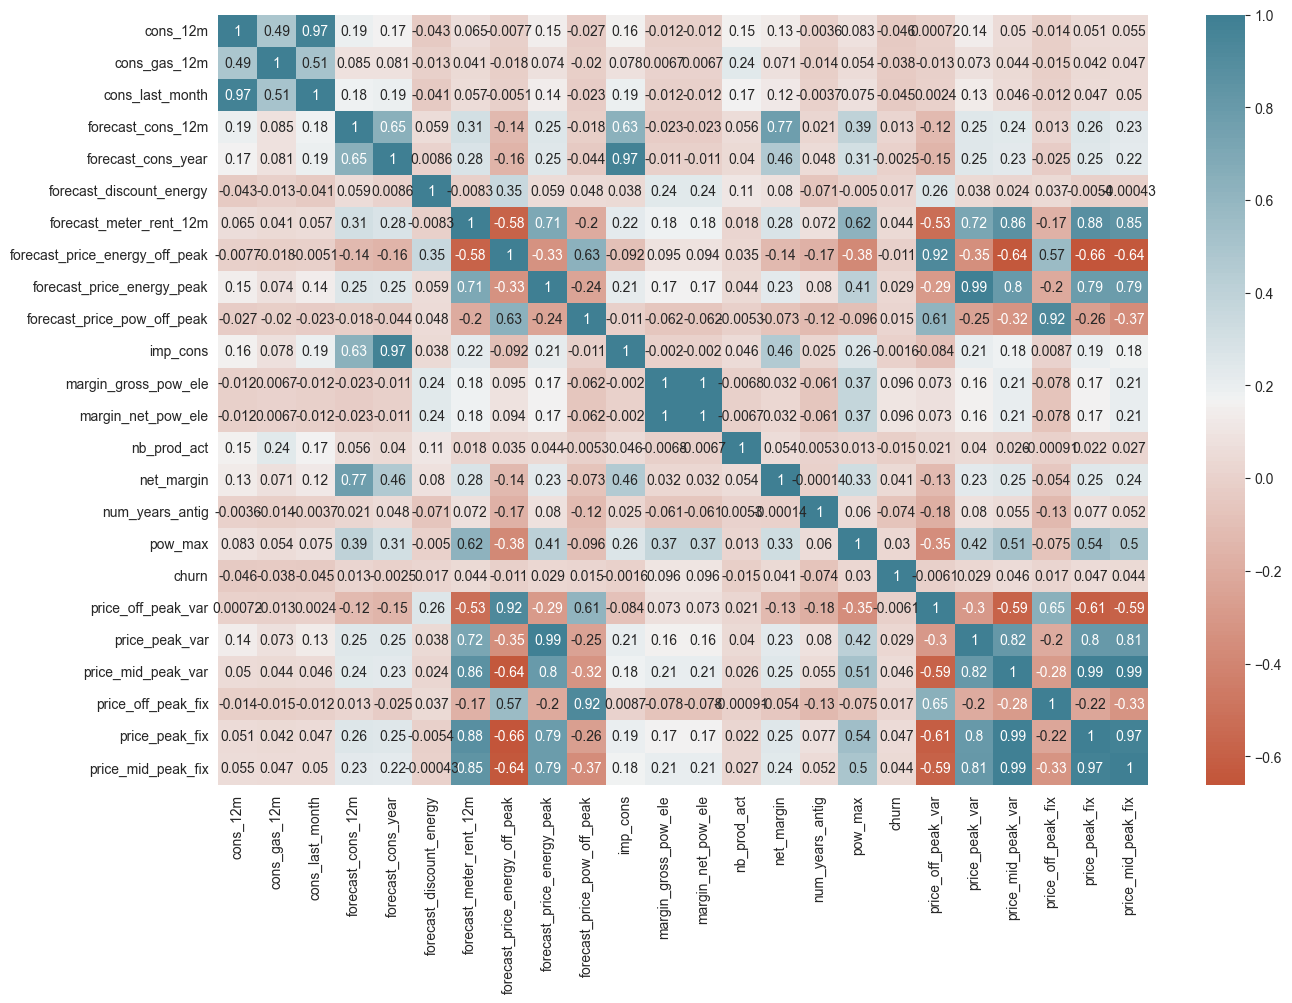

In [22]:
## Correlation analysis

plt.figure(figsize=(15,10))
corre=merged_df.corr()
ax=sns.heatmap(corre,annot=True,cmap=sns.diverging_palette(20, 220, n=200))
#bottom, top = ax.get_ylim()
plt.show()

**Degree of correlation:**

- Perfect: If the value is near ± 1, then it said to be a perfect correlation: as one variable increases, the other variable tends to also increase (if positive) or decrease (if negative).
- High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.
- Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.
- Low degree: When the value lies below + .29, then it is said to be a small correlation.
- No correlation: When the value is zero.

In [95]:
print(corre["churn"].sort_values(ascending=False))

churn                             1.000000
margin_net_pow_ele                0.095820
margin_gross_pow_ele              0.095774
price_peak_fix                    0.046852
price_mid_peak_var                0.046120
price_mid_peak_fix                0.044446
forecast_meter_rent_12m           0.044257
net_margin                        0.041077
pow_max                           0.030414
price_peak_var                    0.029314
forecast_price_energy_peak        0.029254
forecast_discount_energy          0.017113
price_off_peak_fix                0.016643
forecast_price_pow_off_peak       0.014872
forecast_cons_12m                 0.012882
imp_cons                         -0.001552
forecast_cons_year               -0.002540
price_off_peak_var               -0.006075
forecast_price_energy_off_peak   -0.010703
nb_prod_act                      -0.014780
cons_gas_12m                     -0.037897
cons_last_month                  -0.045237
cons_12m                         -0.045918
num_years_a

**Observation**

The correlation values above shows there isn't a very significant feature which is directly related to the customer churning or not behaviour. We will proceed with the hypothesis testing to prove the former statement.

## Hypothesis Testing

**Steps to perform Hypothesis Testing:**

*- Define null and alternative hypothesis*

*- Examine data, check assumptions*

*- Calculate Test Statistic*

*- Determine the Corresponding p-value*

*- Make a decision about the null hypothesis.*

 **- Define null and alternative hypothesis: Lets investigate a price factor which might or might not affect the customer's churning or not**

- H0 (null hypothesis): price change does not affect the churning of customers.

- Ha (alternative hypothesis): price change does affect the churning of customers.



In [208]:
price_neg = merged_df[merged_df.churn == 1]['price_peak_fix']
price_pos = merged_df[merged_df.churn == 0]['price_peak_fix']

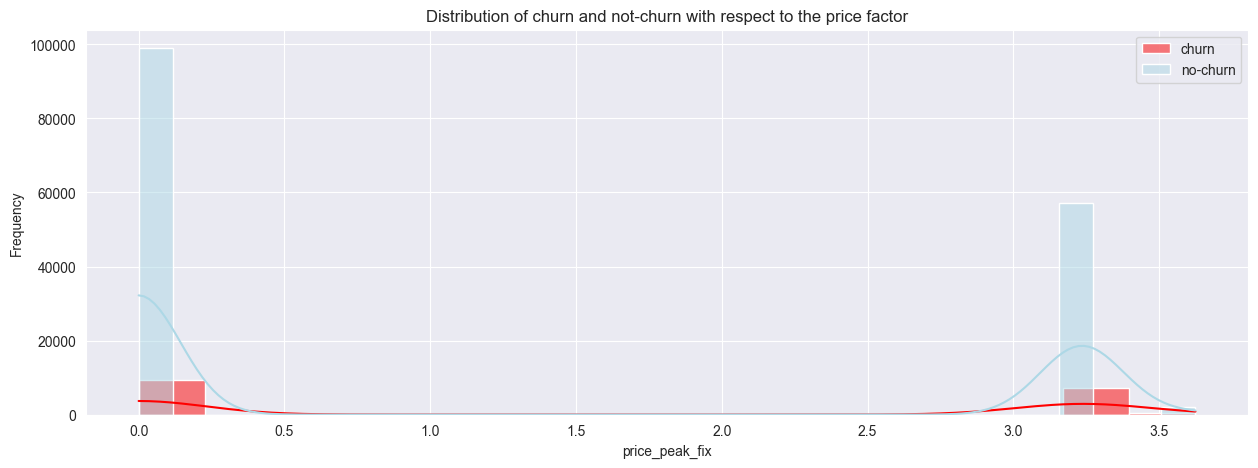

In [289]:
fig, ax = plt.subplots(figsize=(15,5))

sns.histplot(np.log1p(price_neg), kde=True, ax=ax, color='red', label ='churn')
sns.histplot(np.log1p(price_pos), kde=True, ax=ax, color='lightblue', label ='no-churn')
plt.title('Distribution of churn and not-churn with respect to the price factor')
ax.set(ylabel='Frequency')
plt.legend()


It seems customer churning frequency happens at lower price as well as higher price fluctuations. It doesn't seem to be price related.

In [237]:
# The appropriate test

from scipy.stats import ttest_ind

t_stat, pvalue = ttest_ind(price_neg, price_pos, alternative = 'less')
print ('t-statistic:',t_stat, '\np-value:', pvalue)

if pvalue < 0.05:
    print('Reject Null Hypothesis HO')
elif pvalue >= 0.05:
    print('Fail to reject Null Hypothesis HO')

t-statistic: 19.62922026575513 
p-value: 1.0
Fail to reject Null Hypothesis HO


### Conclusion : There is no apparent relationship between the price and the rate of customers churning.

In [298]:
merged_df.to_csv('final_df')